# Configuración del Entorno


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Proyecto - Accidente Cerebrovascular 🤯

<p align="justify">
Los ACV son interrupciones del flujo sanguíneo al cerebro, que conllevan a largos periodos de internación y en gran medida secuelas permanentes que requieren cuidados especiales. NovaCare, líder en medicina prepaga, busca reducir costos de internación y tratamiento posteriores a la misma entendiendo que la prevención es clave, para ello empresa se enfoca en entender que condiciones clínicas y factores sociales aumentan el riesgo de ACV y de esta forma impulsar programas de concientización y prevención para pacientes de alto riesgo promoviendo un estilo de vida saludable.
<br>

<img src='https://drive.google.com/uc?id=1G4hRJ9CrRU_O5ypiuUaWekexOX-32FNi'>

**Contexto Empresarial**
<p align="justify">
La investigación de los casos de accidentes cerebrovasculares es de suma importancia debido a la grave repercusión que esta enfermedad tiene en la salud y calidad de vida de las personas. Un accidente cerebrovascular, también conocido como ACV o embolia cerebral, ocurre cuando hay una interrupción del flujo sanguíneo al cerebro, ya sea por un bloqueo en una arteria (infarto isquémico) o por la ruptura de un vaso sanguíneo (infarto hemorrágico). Uno de los motivos principales por los que el estudio de estos casos es relevante es porque los infartos cerebrales son una de las principales causas de muerte en todo el mundo, según la OMS el 11% de las muertes se producen por accidentes de esta índole.
<br><br>
<p align="Center">
<img src='https://drive.google.com/uc?id=1NyDg1Dek1hyFw-NP0k--C9d2gyBZ7T-E'>

<p align="justify">
Además de ser potencialmente mortales (sobre todo en los casos de los ACV hemorrágicos), también pueden tener consecuencias graves como discapacidades motrices y cognitivas duraderas o bien permanentes en las personas que los sufren. Entre las secuelas más comunes podemos mencionar: dificultades para hablar, caminar o realizar actividades cotidianas, así como problemas de memoria y dificultades para entender o comunicarse con su entorno.
<p align="justify">
El estudio de los casos de infarto cerebral permite comprender mejor los factores de riesgo asociados con esta enfermedad, entre los principales factores de riesgo se encuentran la hipertensión arterial, la diabetes, el tabaquismo, la obesidad, el sedentarismo y el consumo excesivo de alcohol.
<p align="justify">
Al conocer estos factores, se pueden implementar medidas preventivas y promover un estilo de vida saludable que contribuya a reducir el riesgo de experimentar un accidente de estas características.
<br><br>

**Problema Comercial**

<p align="justify">
NovaCare, empresa líder en el rubro de medicina prepaga intenta reducir sus costos de internación, en el último tiempo ha detectado que los cuadros relacionados con los accidentes cerebrovasculares generan periodos de internación por encima de la media, adicionalmente han detectado que el 30% de los pacientes que sobrevive a un ACV quedan con secuelas permanentes debido al daño neurológico lo que se traduce en que dichos pacientes van a requerir más cuidados y por ende harán un mayor uso de los recursos de la empresa.
<br><br>

**Objetivo y pregunta problema**
<p align="justify">
Siguiendo el espíritu innovador que caracteriza a NovaCare concluye que en estos casos la prevención es un factor fundamental y por ende quiere entender que condiciones clínicas y que factores del sociales la vida de una persona, como son sus actividades o hábitos, pueden aumentar el riesgo de sufrir un ACV y así, de esta forma llevar a cabo planes de concientización y prevención sobre aquellos pacientes con mayor riesgo y así evitar internaciones y posteriores secuelas.
<br><br>
<p align="Center">
<img src='https://drive.google.com/uc?id=1ETxsx3Y0gZJi3JwT1q7jeyWMhkHPm624'>
<br><br>

**Contexto Analítico**
<p align="justify">
Para intentar contestar dichos interrogantes NovaCare nos ha proporcionado acceso a una base de datos de pacientes que se han atendido en sus clínicas en el último año, el conjunto de pacientes presenta características generales con un relevamiento de aspectos clínicos y sociales pero no se ha informado las razones de la consulta en cada caso.
<p align="justify">
La información proporcionada cuenta con 5110 registros de pacientes únicos que cubren un rango etario que va desde los neonatales hasta adultos mayores, incluyendo aspectos sociales como lugar de residencia, tipo de trabajo, situación frente al tabaquismo, etc. Por el lado clínico se nos proporciona información sobre problemas cardiacos, hipertensión, índice de masa corporal, etc.
<p align="justify">
Cabe mencionar que a primera vista el conjunto de datos no presenta un numero sustancial de faltantes y adicionalmente en cada caso contamos con un registro en donde los pacientes han sufrido un accidente cerebrovascular, información que será de suma utilidad para desarrollar la investigación encomendada.

El detalle de los atributos es el siguiente:

**id:** identificador único
gender: "Male" (masculino), "Female" (femenino) u "Other" (otro)

**age**: edad del paciente

**hypertension:** 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión

**heart_disease:** 0 si el paciente no tiene enfermedades cardíacas, 1 si el paciente tiene una enfermedad cardíaca

**ever_married:** el paciente alguna vez estuvo casado? "No" (no) o "Yes" (sí)

**work_type:** tipo de trabajo que tiene el paciente: "children" (niños), "Govt_jov" (trabajo gubernamental), "Never_worked" (nunca ha trabajado), "Private" (privado) o "Self-employed" (autónomo)

**Residence_type:** tipo de residencia donde habita el paciente "Rural" (rural) o "Urban" (urbano)

**avg_glucose_level:** nivel promedio de glucosa en sangre (mg/dl)

**bmi:** índice de masa corporal

**smoking_status:** relación del paciente con el hábito del tabaco "formerly smoked" (ex-fumador), "never smoked" (nunca ha fumado), "smokes" (fuma) o "Unknown" (desconocido)*

**stroke:** 1 si el paciente ha tenido un accidente cerebrovascular o 0 si no lo ha tenido


In [2]:
#Cargamos el dataset provisto por el centro de salud para comenzar con el analisis exploratorio de los datos
file_path = '/content/healthcare-dataset-stroke-data.csv'

df_stroke = pd.read_csv(file_path)

df_stroke.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Analisis Exploratorio de los datos (EDA) y Data Wrangling

In [3]:
#Exploramos nuestro dataset en busca de valores faltantes
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#Notamos algunos tipos de datos que no representan los valores contenidos en la variable, para convertir las variables tipo objeto utilizamos una funcion que itera cambiando los tipos a categoricos
lista_objetos = df_stroke.columns[df_stroke.dtypes == "object"].tolist()
for obj in lista_objetos:
    df_stroke[obj] = df_stroke[obj].astype("category")

#Para las demas variables realizamos un cambio manual ya que algunas categoricas ya se encuentran codificadas
df_stroke[['age']] = df_stroke[['age']].astype(int)
df_stroke[['hypertension']] = df_stroke[['hypertension']].astype("category")
df_stroke[['heart_disease']] = df_stroke[['heart_disease']].astype("category")

#Detectamos que una de las columnas no sigue el patron de minusculas de los titulos, lo corregimos
df_stroke = df_stroke.rename(columns={"Residence_type": "residence_type"})

#Adicionalmente se detectaron 201 entradas faltantes de indice de masa corporal (bmi), procedemos a completar los datos faltantes con la mediana
df_stroke['bmi']=df_stroke['bmi'].fillna(df_stroke['bmi'].median())

# Eliminamos el ID ya que no lo vamos a utilizar como indice y no aporta valor al dataset
df_stroke = df_stroke.drop(columns=['id'])

#Verificamos que no contamos con valores nulos luego del paso anterior y que los tipos son correctos
print(df_stroke.isna().sum(),'\n\n')
df_stroke.info()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   int64   
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-nul

In [5]:
#Análisis básico de las variables numéricas limitando los decimales para facilitar la lectura
df_stroke.describe().round(1)

,age,avg_glucose_level,bmi,stroke
count,5110.0,5110.0,5110.0,5110.0
mean,43.2,106.1,28.9,0.0
std,22.6,45.3,7.7,0.2
min,0.0,55.1,10.3,0.0
25%,25.0,77.2,23.8,0.0
50%,45.0,91.9,28.1,0.0
75%,61.0,114.1,32.8,0.0
max,82.0,271.7,97.6,1.0


💡 **Insights**:

*   Edad (age) incluye pacientes con edades menores a 1
*   Indice de masa corporal (bmi) muestra valores máximos que se van de las escalas clinicas, donde 50 ya se considera obesidad extrema
*   Promedio de azúcar en sangre  muestra valores dentro de los limites clínicos


In [6]:
#Análisis básico de las variables categóricas
df_stroke.describe(include="category")

,gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status
count,5110,5110,5110,5110,5110,5110,5110
unique,2,2,2,2,5,2,4
top,Female,0,0,Yes,Private,Urban,never smoked
freq,2995,4612,4834,3353,2925,2596,1892


In [7]:
#Como se menciona anteriormente en los "insights" los valores registrados en BMI presentan valores por fuera de las escalas clinicas (límite superior), por lo que procedemos a eliminar dichos registros que superan los 50 puntos de BMI
df_stroke = df_stroke[df_stroke['bmi'] < 50]

#Verificamos que los registros se han eliminado
df_stroke['bmi'].describe().round(1)


count    5031.0
mean       28.4
std         6.9
min        10.3
25%        23.7
50%        28.1
75%        32.5
max        49.9
Name: bmi, dtype: float64

## Resumen de Analisis Exploratorio de los datos (EDA) y Data Wrangling


*   Se corrigieron los tipos de datos según las variables para que representen realmente los valores almacenados
*   Se completaron los datos faltantes correspondientes al indice de masa corporal utilizando la mediana
*   Corrección de titulos para que respeten el formato de minusculas
*   Remoción de la columna ID ya que no se utilizará en esta investigación
*   Se removieron los registros que presentaban valores extremadamente altos en la variable IMC (BMI) por considerarse erroneos ya que se van de los limites de las tablas clínicas.




# Analisis univariado de los datos

<p align="justify">
En esta seccion del EDA vamos a descubrir la distribucion de nuestros registros en el dataset según cada una de las dimensiones.

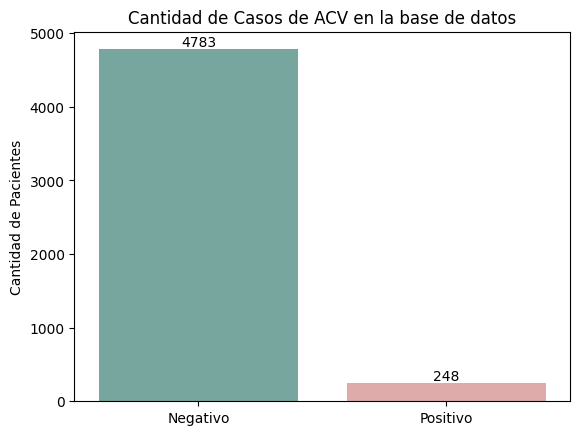


 stroke
0    4783
1     248
Name: stroke, dtype: int64


In [8]:
#Analizamos el balance entre los casos de ACV positivos y negativos, este punto es sumamente importante ya que se trata de nuestra variable "Target"
strokes =df_stroke.groupby('stroke')["stroke"].count()
strokes

#Procedemos a graficar nuestra variable target
sns.color_palette("rocket", as_cmap=True)
g = sns.barplot(x=['Negativo', 'Positivo'], y=strokes, palette=["#6faea4","#E7A1A1"])

g.set(xlabel=None, ylabel="Cantidad de Pacientes", title="Cantidad de Casos de ACV en la base de datos")

for p in g.patches:
    g.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

print("\n",strokes)


💡 **Insights**:


*   Nuestro dataset se encuentra desbalanceado donde solamente tenemos un 5.18% de casos confirmados.



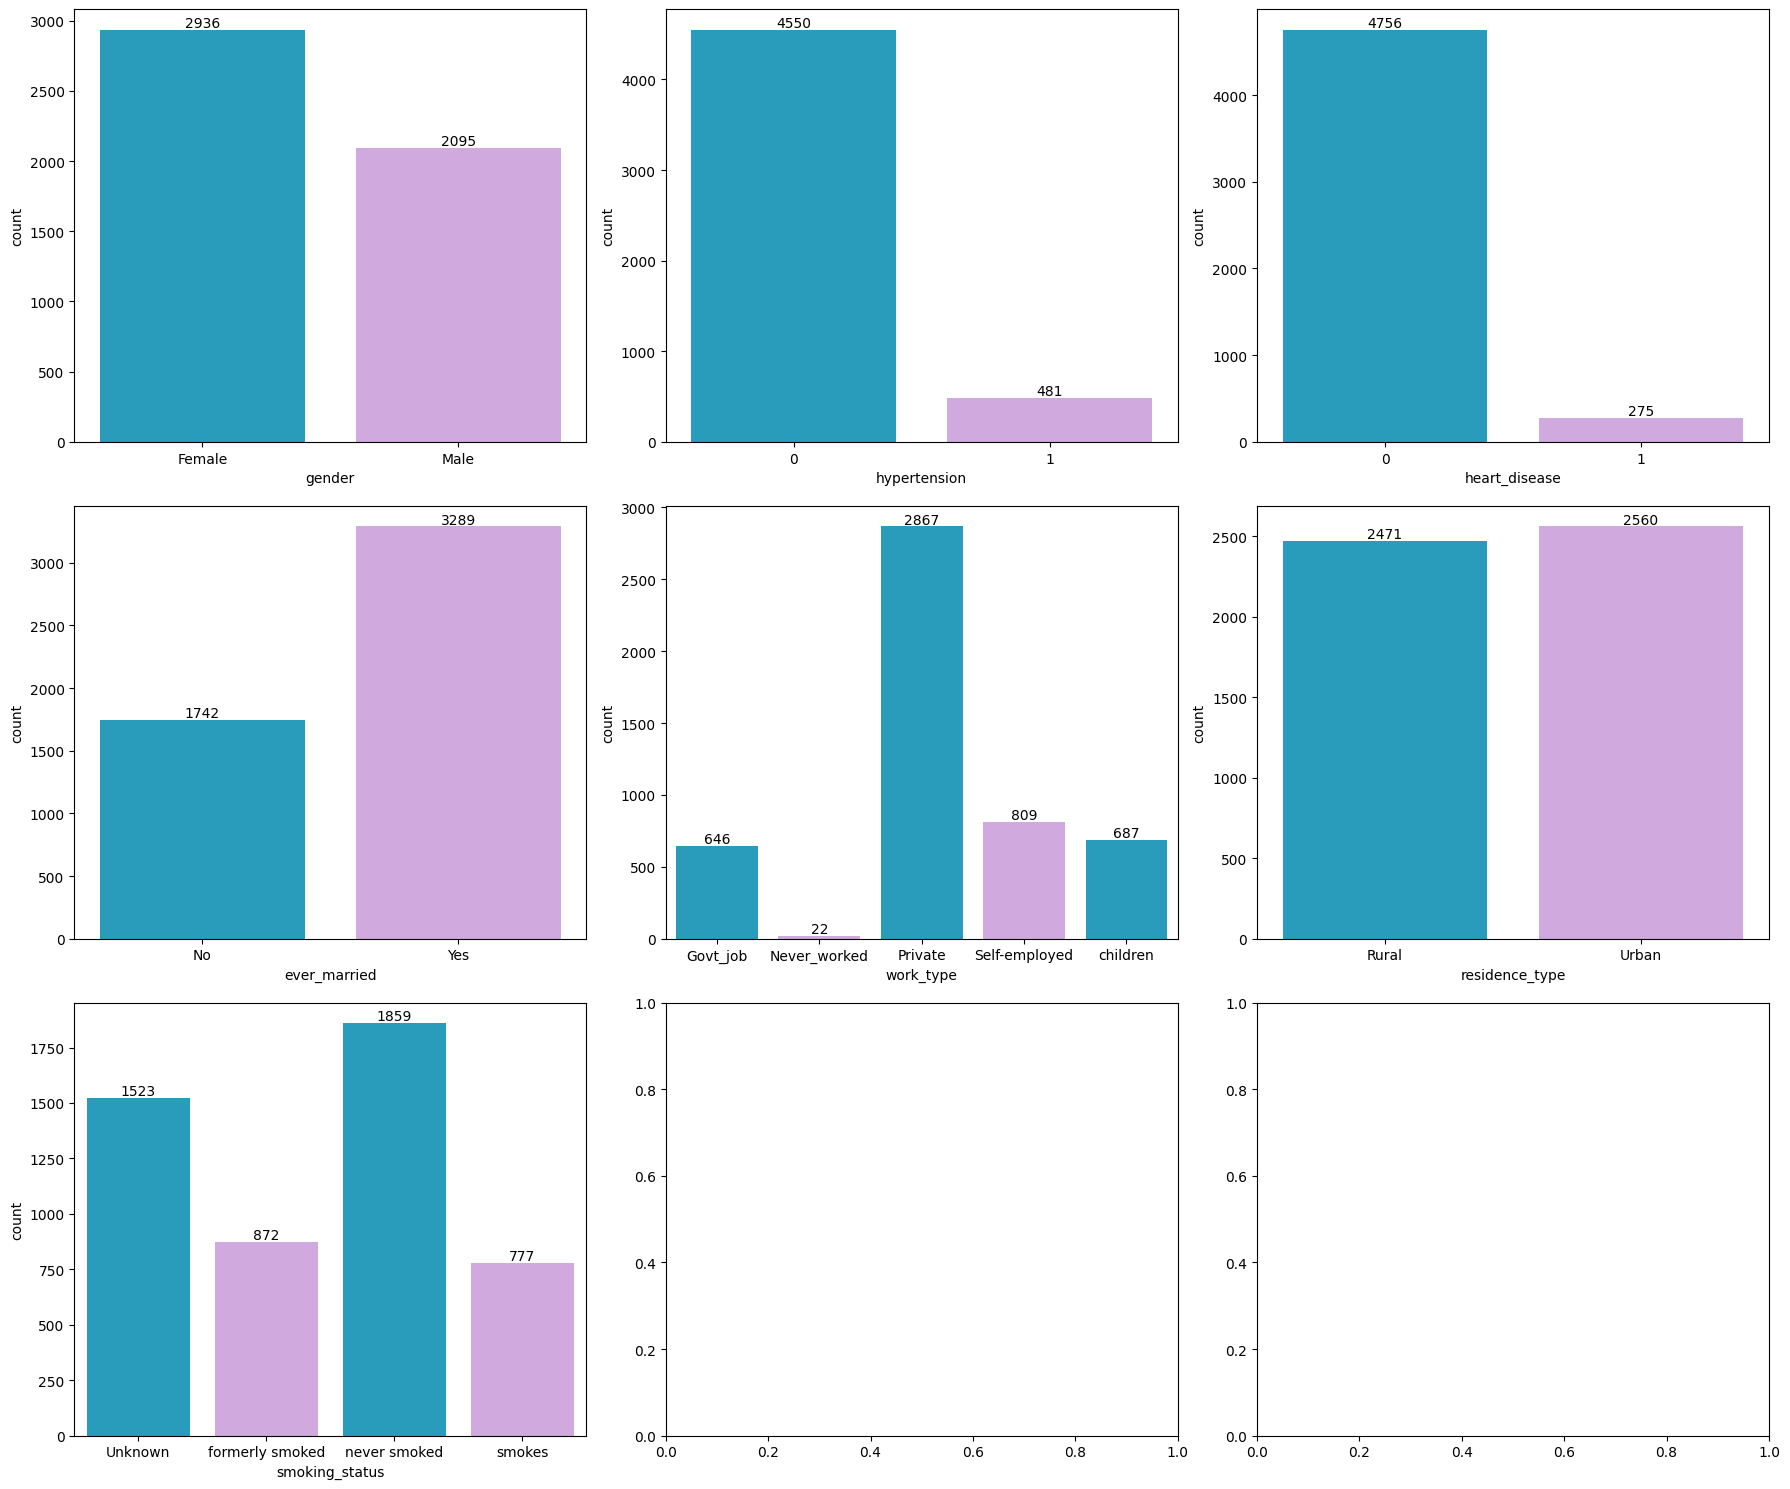

In [9]:
#Generamos una lista con las variables categoricas
cat_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

#Configuramos nuestros gráficos de barras
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

#Graficamos nuestras variables con el valor de cada columna a traves de una función que itera sobre las mismas
for variable, subplot in zip(cat_variables, axs.flatten()):
    sns.countplot(x=variable, data=df_stroke, ax=subplot, palette=["#11aad3","#D4A1E7"])

    for p in subplot.patches:
      subplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

💡 **Insights**:

*   Algunas variables categoricas estan desbalanceadas, como por ejemplo los casos con hipertension (hypertension), problemas cardiacos (heart_disease) o tipo de trabajo (work_type)
*   Genero (gender) y estado civil (ever_married) estan moderadamente desbalanceadas.
*   Las demas variables estan levemente desbalanceadas pero el desbalance a priori no pareciera ser significativo.

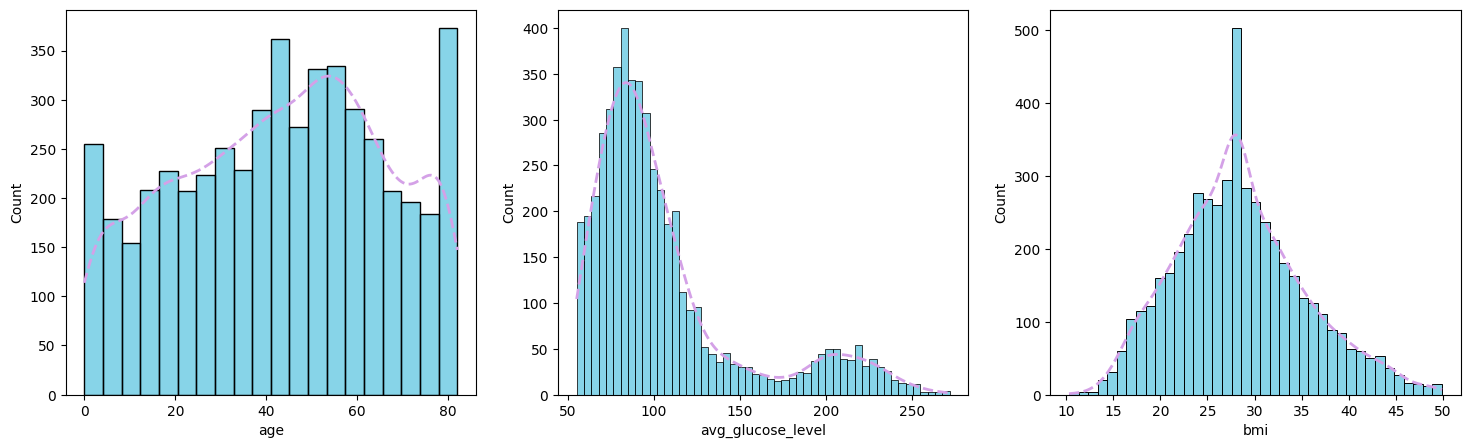

In [10]:
# Generamos una lista con las variables continuas
continuous_variables = ['age', 'avg_glucose_level', 'bmi']

# Configuramos nuestros histogramas para graficarlas
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for var, subplot in zip(continuous_variables, axs.flatten()):
  sns.histplot(df_stroke[var], kde=True, ax=subplot, color="#11aad3", line_kws={ 'lw': 2, 'ls': 'dashed'})
  subplot.lines[0].set_color('#D4A1E7')
plt.show()

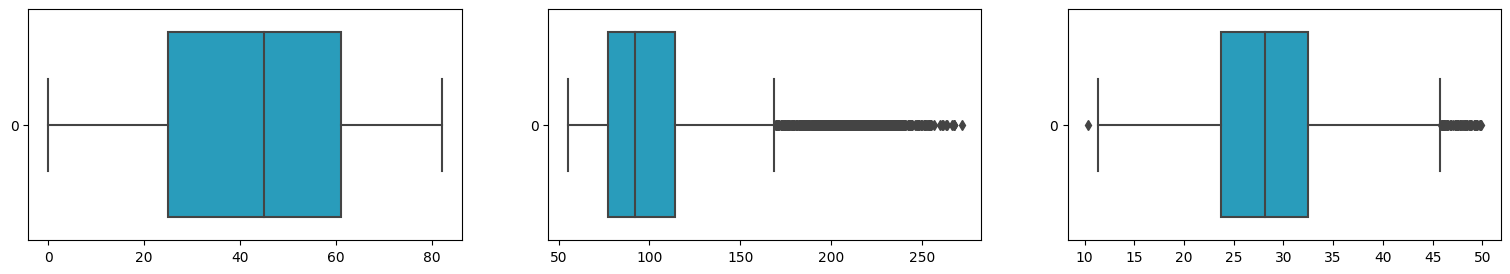

In [11]:
# Observamos una distribución con orientación a la derecha en los valores de glucosa e indice de masa corporal por lo que nos interesa conocer los outliers
fig, axs = plt.subplots(1, 3, figsize=(19, 3))

for var, subplot in zip(continuous_variables, axs.flatten()):
  sns.boxplot(df_stroke[var], ax=subplot, orient="h", color="#11aad3")
plt.show()

💡 **Insights**:

*   Edad (age) presenta una distribucón normal a excepcion de sus extremos, donde vemos un algo número de personas por debajo de los 4 años y por encima de los 80.
*   Los niveles de azucar en sangre (avg_glucose_level) presenta una distribución normal con sesgo a la derecha pero los valores se encuentran dentro de los limites clinicos como vimos anteriormente
*   Indice de masa corporal (bmi) presenta una distribucion normal ya que en un paso previo dejamos fuera del muestreo aquellos valores que superaban los 50 puntos de BMI por considerarlos erroneos, ya que se encontraban fuera de las escalas clinicas.

# Analisis Multivariado de los datos
<p align="justify">
En esta seccion del EDA vamos a intentar descubrir como las diferentes dimensiones se relacionan con nuestra variable target con el fin de detectar posibles correlaciones que puedan servirnos mas adelante.

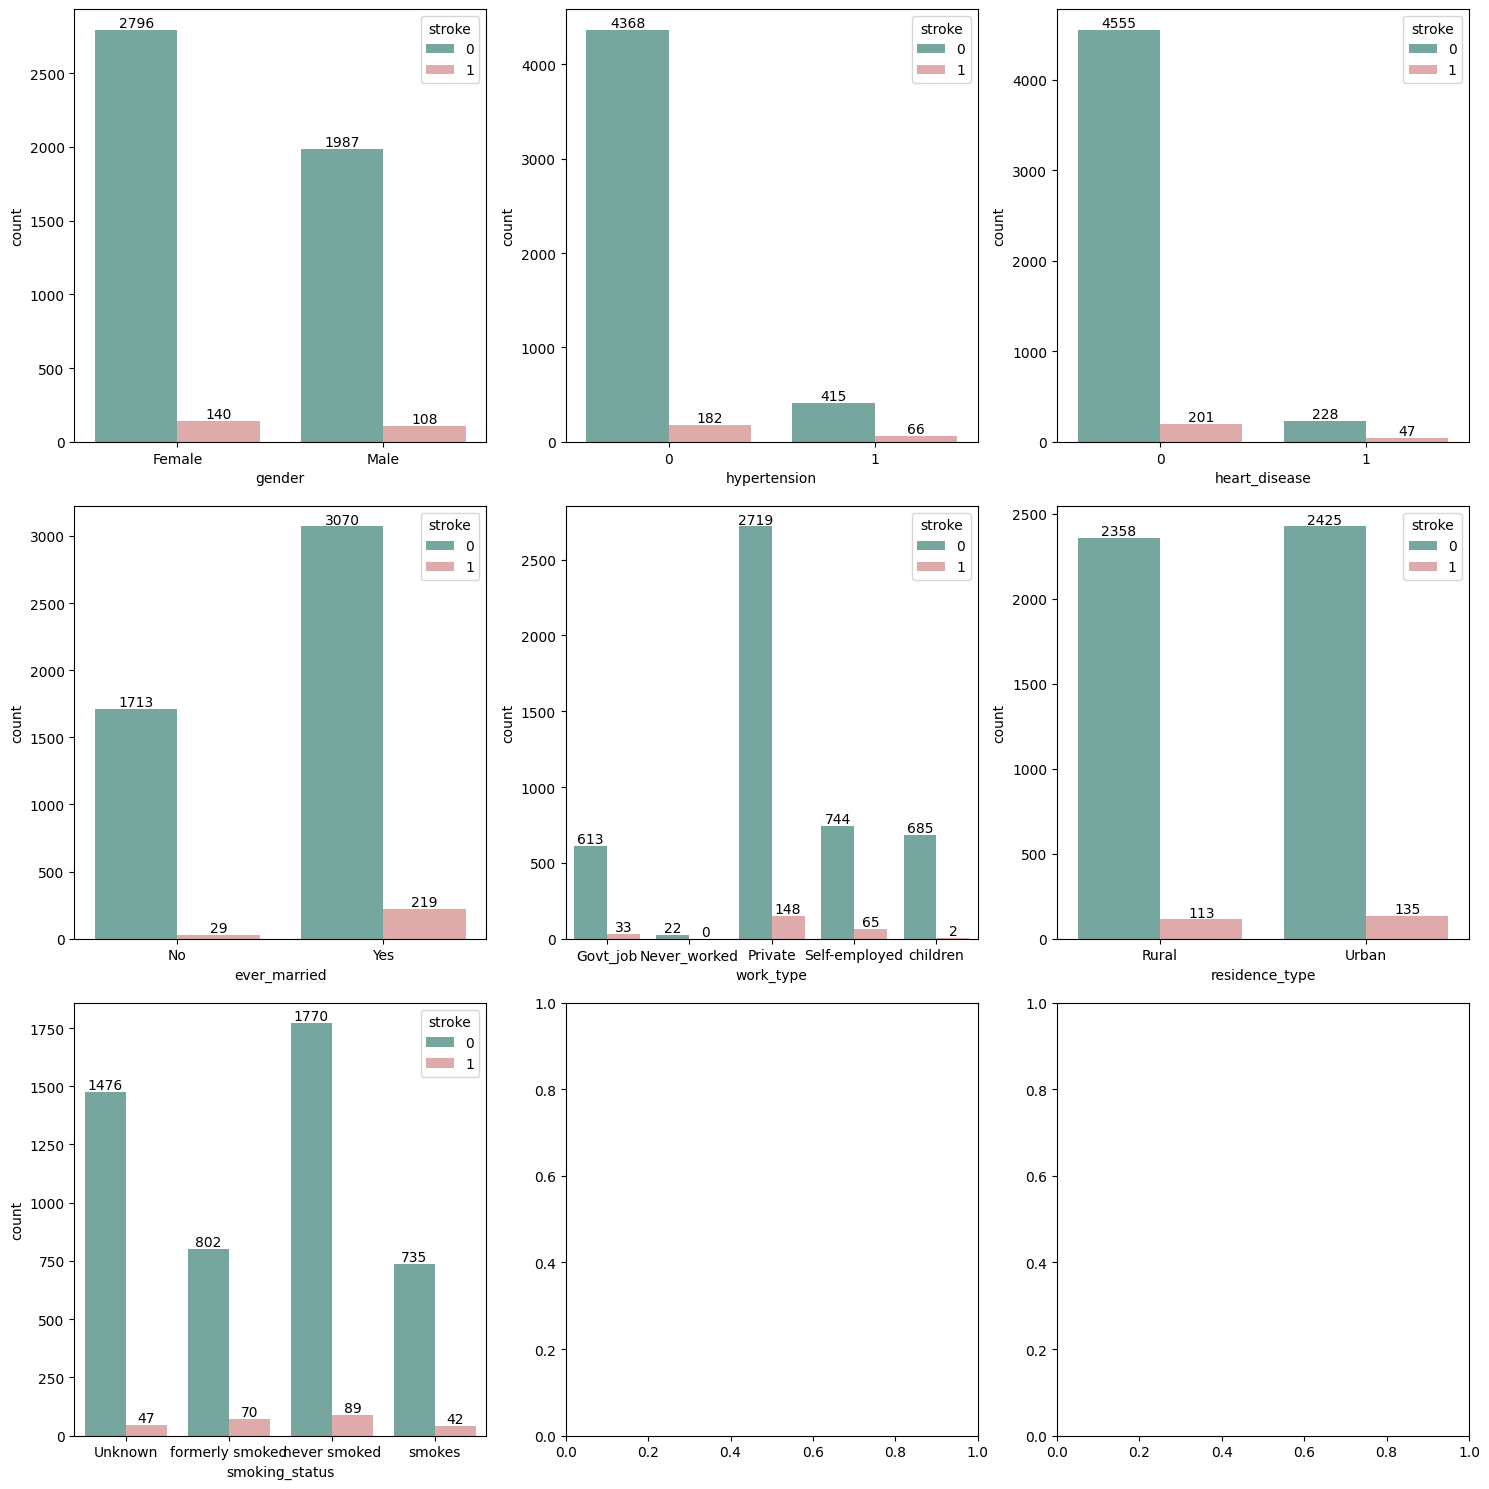

In [12]:
# Utilizamos gráficos de barras para identificar como cada variable categorica se relaciona con nuestra variable objetivo'stroke'
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for var, subplot in zip(cat_variables, axs.flatten()):
    sns.countplot(x=df_stroke[var], hue=df_stroke['stroke'], ax=subplot, palette=["#6faea4","#E7A1A1"])
    for p in subplot.patches:
        if not pd.isna(p.get_height()):
            subplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()



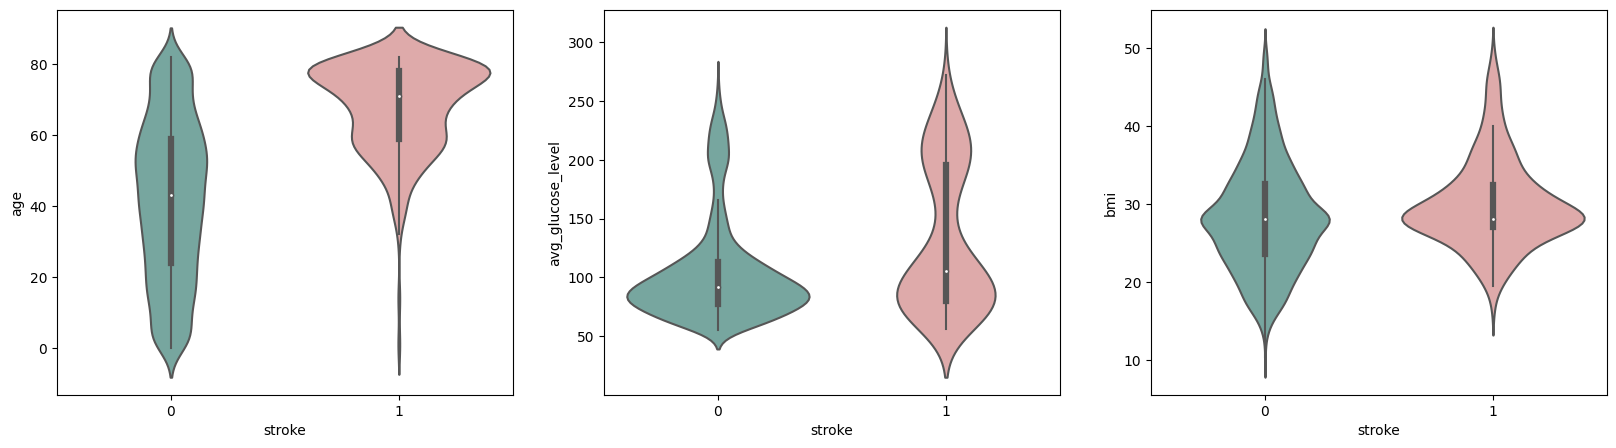

In [13]:
# Utilizamos graficos de violin para identificar como cada variable continua se relaciona con nuestra variable objetivo'stroke'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.violinplot(x=df_stroke['stroke'], y=df_stroke[var], ax=subplot, palette=["#6faea4","#E7A1A1"])
plt.show()



In [14]:
# Para futuros analisis vamos a precisar de un dataframe codificado, por esta razon ejecutamos los siguientes pasos.

# Primero generamos una copia de nuestro Dataset con las variables dummies
encoded = pd.get_dummies(df_stroke)

# Dropeamos las columnas de valores binarios para quedarnos solo con 1
encoded =encoded.drop(columns=['hypertension_0','heart_disease_0','gender_Female','ever_married_No', 'residence_type_Rural','smoking_status_Unknown'])

# Renombramos algunas columnas para que tengan mas sentido
encoded = encoded.rename(columns= {'gender_Male': 'gender', 'hypertension_1': 'hypertension', 'heart_disease_1' : 'heart_disease', 'ever_married_Yes' :'ever_married','residence_type_Urban': 'urban_residence', 'smoking_status_formerly smoked' : 'fomerly_smoked', 'smoking_status_never smoked' : 'never_smoked','smoking_status_smokes': 'smokes' })

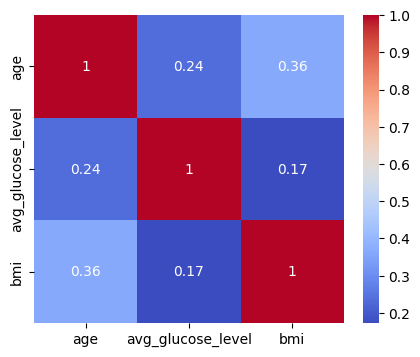

In [15]:
# Finalmente para concluir nuestro analisis exploratorio graficamos un heatmap para conocer que relaciones entre las variables continuas, ya que las relaciones con las categoricas no pueden ser analizadas en este tipo de matriz

continuas= df_stroke[['age', 'avg_glucose_level', 'bmi']]

# Ya que las variables tienen diferente tipo de unidad de medida debemos escalarlas para evitar el sesgo
scaler = StandardScaler()
scaled_data = scaler.fit_transform(continuas)

# Crear un DataFrame con los datos escalados
scaled_heat = pd.DataFrame(scaled_data, columns=continuas.columns)

fig, axs = plt.subplots(figsize=(5, 4))
matriz = scaled_heat.corr()
sns.heatmap(matriz, cmap='coolwarm', annot=True)
plt.show()


# Interpretación de los resultados
<p align="justify">
Definiciones resultantes del análisis de las variables aisladas y su distribución en el dataset.

###Variable Target:
<p align="justify">
La muestra de casos positivos y negativos no esta balanceada (4783 negativos - 248 positivos, siendo los casos positivos solo un 5.18% de la muestra.)

<br>

❗ **Nota:** Es importante tener en consideración que los resultados expresados en cantidades pueden ser un sesgo ya que al tener muchos mas datos en la categoría de negativos podría prestar a confusión por ende las siguientes observaciones se hicieron con respecto a la proporción de los casos positivos en cada variable.
<br><br>

###Variables Categóricas:

**gender:** los registros muestran un mayor número de pacientes femeninos que masculinos, al relacionar esta variable con nuestro target observamos que los hombres tienen un mayor % de casos de stroke positivos que las mujeres.

**hypertension:** la mayoría de los casos registrados son de pacientes que no sufren hipertensión, pero al compararlo con nuestra variable target nos damos cuenta que aquellos que tienen hipertension son más propensos a nivel porcentaje de sufrir un ACV.

**heart_disease:** la mayoría de los casos registrados no presentan enfermedades cardiacas, al igual que sucede con la hipertensión, los pacientes con condiciones cardiacas parecen mostrar una tendencia a casos de ACV positivos al compararla con la variable objetivo.

**ever_married:** la mayoría de los pacientes registrados están o estuvieron casados, y este grupo presenta una mayor proporción de casos positivos de ACV.

**work_type:** la mayoría de los pacientes registrados son trabajadores formales del sector privado o autónomos, siendo estos ultimos los que tienen una mayor tendencia a desarrollar la condición.

**Residence_type:** la distribución referente al tipo de residencia se encuentra bastante balanceada. No hay una tendencia definida según el lugar de residencia.

**smoking_status:** la mayoría de los pacientes nunca fumó, pero se observa un gran número de pacientes de los cuales no se tiene registro, siendo a priori una categoría difícil de poder utilizar en futuros análisis.
<br><br>

###Variables Continuas:

**age:** el dataset presenta registros con un rango edad bien amplio, ya que hay registros de bebes y de adultos mayores, la distribución concentra pacientes en edades entre los 35 a los 65 años teniendo un pico en los mayores de 80, siendo los pacientes mayores los mas propensos a desarrollar cuadros de ACV.

**avg_glucose_level:** la mayoría de los pacientes presenta un nivel promedio de azúcar en sangre que va desde los 50 a los 125, pero notamos presencia de pacientes con un valor alto lo que nos da una 'cola" hacia la derecha. Los pacientes que sufrieron casos de ACV tienen un promedio de azúcar en sangre mayor a los que no.

**bmi:** la mayoría de los pacientes presenta un índice de masa corporal entre 20 y 40 que en medicina es considerado normal. Según el análisis la distribución de los casos de ACV positivos no parece verse afectado por el índice de masa corporal (BMI)
<br><br>

###Matriz de Relación:
<p align="justify">
No se detectan relaciones relevantes entre las variables continuas de nuestro dataset.

# Preguntas Problema
<p align="justify">
En este apartado del analisis haremos foco en intentar responder las preguntas planteadas, de tal manera que no se dependa de la interpretación de un gráfico y poder tener valores absolutos sobre la incidencia de las condiciones en cada caso.
<p align="justify">
Comenzamos con nuestra primer pregunta:

### **- Las personas con problemas de hipertensión y afecciones cardiacas son más propensas a desarrollar síntomas?**

In [16]:
# Generamos nuestra tabla pivot utilizando age como columna de valores ya que necesitamos hipertension, afecciones cardiacas y stroke como indices
pivot_table = pd.pivot_table(df_stroke, values='age', index=['hypertension','heart_disease', 'stroke'], aggfunc='count')

# Cambiamos el nombre de la columna a "Cantidad"
pivot_table.columns = ['Cantidad']

# Calculamos en una nueva columna el porcentaje en cada caso
pivot_table['Porcentaje'] = ((pivot_table['Cantidad'] / pivot_table.groupby(['hypertension', 'heart_disease'])['Cantidad'].transform('sum')) * 100).round(1)

pivot_table

Cantidad  Porcentaje
hypertension heart_disease stroke                      
0            0             0           4191        96.6
                           1            148         3.4
             1             0            177        83.9
                           1             34        16.1
1            0             0            364        87.3
                           1             53        12.7
             1             0             51        79.7
                           1             13        20.3

<p align="justify">
Haciendo un análisis de porcentaje podemos observar que se confirma lo observado en los gráficos de barra en el apartado de análisis multivariado (gráficos 2 y 3) que aquellas personas con problemas de hipertensión y afecciones cardíacas tienen una mayor probabilidad de desarrollar ACVs que aquellas que no tienen afecciones o bien tiene una sola de las dos mencionadas.

En la muestra se observa:



*   3.4% de las personas sin affecciones sufrió un ACV
*   12.7% de las personas que solo tenian problemas de presión sufrieron un ACV
*   16.1% de las personas que solo tenian problemas cardiacos sufrieron un ACV
*   20.3% de las personas que tenian ambas afecciones sufireron un ACV
<br><br>

**Comprobación Estadística** 📊

<p align="justify">
Vamos a intentar corroborar las observaciones obtenidas desde el punto de vista estadístico, para este caso particular vamos a utilizar el coeficiente CHI2 ya que tenemos que comparar 3 variables categoricas y es el coeficiente que mejor se ajusta.

Definimos nuestras hipotesis nula y alternativa:

H0: "Las afecciones cardíacas y los problemas de presión no están relacionados con los accidentes cerebrovasculares (ACV)"

H1: "Las afecciones cardíacas y los problemas de presión están relacionados con los accidentes cerebrovasculares (ACV)"



In [17]:
# Creamos una tabla de contingencia con nuestras 3 variables que dará como resultado algo similar a lo que vimos en la pivot del paso anterior
tabla_observados = pd.crosstab([df_stroke['hypertension'], df_stroke['heart_disease']], df_stroke['stroke'])
tabla_observados

stroke                         0    1
hypertension heart_disease           
0            0              4191  148
             1               177   34
1            0               364   53
             1                51   13

In [18]:
# Aplicamos el coeficiente de Chi2 para calcular nuestro p-valor
p_valor= stats.chi2_contingency(tabla_observados)

# Para que interpretar el resultado sea mas sencillo, verificamos con un condicional si el valor de p_valor es menor o mayor al 0.05
print("RESULTADO de la Comprobación Estadística:\n")
print("p_valor: ", p_valor[1])
# Evaluamos el segundo elemento de p_valor ya que el coeficiente devuelve un array de valores y el correspondiente al p_valor se encuentra en la segunda posicion
if p_valor[1] < 0.05:
  print("Se rechaza la hipotesis nula, \033[1;32mSI hay relación entre las variables")
else:
  print("Se acepta la hipotesis nula, \033[1;31mNO hay relacion entre las variables")

RESULTADO de la Comprobación Estadística:

p_valor:  2.707205411566131e-35
Se rechaza la hipotesis nula, SI hay relación entre las variables


**Conclusión y Respuesta Problema** ✅
<p align="justify">
Con un valor de P_Valor de 2.707205411566131e-35, podemos confirmar lo que se percibió en el analisis realizado con las tablas pivot y los gráficos del EDA, la relación entre las afecciones cardíacas y la presión alta son condiciones íntimamente relacionadas a los accidentes cerebrovasculares por tal motivo los pacientes que presenten algunas de estas condiciones deben ser tratados con medidas de prevención.

### **- Es la edad un factor clave en el desarrollo de un cuadro positivo?**

In [19]:
# Generamos una lista con los rangos etarios (0 y 82 son nuestros valores minimos y maximos segun el dataset)
rangos_etarios = [0, 18, 35, 55, 70, 82]

# Creamos una columna nueva en nuestro dataset basada en los rangos que definimos en la lista
df_stroke['Grupo de Edad'] = pd.cut(df_stroke['age'], bins=rangos_etarios)

# Generamos nuestra tabla pivot definiendo la nueva columna como indice y stroke como valores, que en este caso los sumamos porque los casos positivos son 1 y los negativos 0, por lo que utilizar count no serviria en este caso
pivot_table = pd.pivot_table(df_stroke, values='stroke', index='Grupo de Edad', aggfunc='sum')

# Cambiamos el nombre de la columna de "stroke" a "Casos Positivos"
pivot_table.columns = ['Casos Positivos']

# Calculamos el total de casos positivos realizando la suma para luego calcular el porcentaje
total_casos = df_stroke['stroke'].sum()
pivot_table['Porcentaje'] = ((pivot_table['Casos Positivos'] / total_casos) * 100).round(1)

pivot_table

,Casos Positivos,Porcentaje
Grupo de Edad,,
"(0, 18]",2,0.8
"(18, 35]",1,0.4
"(35, 55]",35,14.1
"(55, 70]",82,33.1
"(70, 82]",128,51.6


<p align="justify">
Efectivamente se confirma lo observado en el primer gráfico de violín en la sección de análisis multivariado los casos positivos se concentran en pacientes por encima de los 35 años y a su vez va aumentando conjuntamente con el avance de la edad, llegando a su máxima concentración en el rango entre los 70 y 82 años.

**Comprobación Estadística** 📊

<p align="justify">
Es el turno de comprobar si al igual que en nuestras observaciones la edad es un aspecto fundamental a tener en cuenta en potenciales desarrollos de cuadros que deriven en accidentes cerebrovasculares. Ya que la edad es una variable cuantivativa y nuesta variable target es nominal o cualitativa el coeficiente que mejor se adapta para este caso es el biserial puntual

Definimos nuestras hipotesis nula y alternativa:

H0: "La edad no influye en los casos de accidentes cerebrovasculares (ACV)"

H1: "La edad influye en los casos de accidentes cerebrovasculares (ACV)"

In [20]:
# Creamos una tabla de contingencia utilizando nuestras variables, es otra forma de mostrar los datos ya que no se utilizará para nuestro cálculo de coeficiente
tabla_observados = pd.crosstab([df_stroke['age']], df_stroke['stroke'])
tabla_observados

stroke,0,1
age,,
0,43,0
1,76,1
2,55,0
3,46,0
4,34,0
...,...,...
78,81,21
79,68,17
80,53,17


In [21]:
# Aplicamos el coeficiente de biserial puntual para calcular nuestro p-valor
p_valor = stats.pointbiserialr(df_stroke['age'], df_stroke['stroke'])

# Para que interpretar el resultado sea mas sencillo, verificamos con un condicional si el valor de p_valor es menor o mayor al 0.05
print("RESULTADO de la Comprobación Estadística:\n")
print("p_valor: ", p_valor[1])
# Evaluamos el segundo elemento de p_valor ya que el coeficiente devuelve un array de valores y el correspondiente al p_valor se encuentra en la segunda posicion
if p_valor[1] < 0.05:
  print("Se rechaza la hipotesis nula, \033[1;32mSI hay relación entre las variables")
else:
  print("Se acepta la hipotesis nula, \033[1;31mNO hay relacion entre las variables")

RESULTADO de la Comprobación Estadística:

p_valor:  1.2806613987039801e-70
Se rechaza la hipotesis nula, SI hay relación entre las variables


**Conclusión y Respuesta Problema** ✅
<p align="justify">
Con un valor de P_Valor de 1.2806613987039801e-70, podemos confirmar lo que se percibió en el analisis realizado con las tablas pivot y los gráficos del EDA, la edad es un factor clave en el desarrollo de cuadros que derivan en casos positivos de accidentes cerebrovascualres, se recomienda un seguimiento intensivo en personas de edad avanzada.

### **- Influye la zona de residencia en los pacientes positivos?**

In [22]:
# Generamos nuestra tabla pivot utilizando age como columna de valores ya que necesitamos el tipo de residencia y stroke como indices
pivot_table = pd.pivot_table(df_stroke, values='age', index=['residence_type', 'stroke'], aggfunc='count')

# Cambiamos el nombre de la columna de "age" a "Cantidad"
pivot_table.columns = ['Cantidad']

# Calculamos en una nueva columna el porcentaje en cada caso
pivot_table['Porcentaje'] = ((pivot_table['Cantidad'] / pivot_table.groupby(['residence_type'])['Cantidad'].transform('sum')) * 100).round(1)

pivot_table

Cantidad  Porcentaje
residence_type stroke                      
Rural          0           2358        95.4
               1            113         4.6
Urban          0           2425        94.7
               1            135         5.3

<p align="justify">
No se observan diferencias significativas que indiquen que la zona de residencia sea un factor a tener en cuenta para nuestro análisis, como se puede observar en el gráfico 6 de nuestra sección de análisis multivariado con respecto a nuestra variable target.

**Comprobación Estadística** 📊

<p align="justify">
Tenemos que confirmar si el lugar de residencia realmente no esta relacionado con los cuadros de ACV, por este motivo y siendo que tenemos dos variables que son nominales y binarias, el coeficiente que mejor se adapta a estos casos es el de CHI.

Definimos nuestras hipotesis nula y alternativa:

H0: "El lugar de residencia no influye en los casos de accidentes cerebrovasculares (ACV)"

H1: "El lugar de residencia influye en los casos de accidentes cerebrovasculares (ACV)"

In [23]:
# Creamos una tabla de contingencia utilizando nuestras variables binarias
tabla_observados = pd.crosstab([df_stroke['residence_type']], df_stroke['stroke'])
tabla_observados

stroke,0,1
residence_type,,
Rural,2358,113
Urban,2425,135


In [24]:
# Aplicamos el coeficiente de Chi2 para calcular nuestro p-valor
p_valor= stats.chi2_contingency(tabla_observados)

# Para que interpretar el resultado sea mas sencillo, verificamos con un condicional si el valor de p_valor es menor o mayor al 0.05
print("RESULTADO de la Comprobación Estadística:\n")
print("p_valor: ", p_valor[1])
# Evaluamos el segundo elemento de p_valor ya que el coeficiente devuelve un array de valores y el correspondiente al p_valor se encuentra en la segunda posicion
if p_valor[1] < 0.05:
  print("Se rechaza la hipotesis nula, \033[1;32mSI hay relación entre las variables")
else:
  print("Se acepta la hipotesis nula, \033[1;31mNO hay relacion entre las variables")

RESULTADO de la Comprobación Estadística:

p_valor:  0.27921412868528783
Se acepta la hipotesis nula, NO hay relacion entre las variables


**Conclusión y Respuesta Problema** ✅
<p align="justify">
Con un valor de P_Valor de 0.27921412868528783, podemos confirmar lo que se percibió en el analisis realizado con las tablas pivot y los gráficos del EDA, el lugar de residencia de una persona no influye en el desarrollo de posibles cuadros de ACV, por lo que no se recomienda considerar dicha variable en la planificacion de ningun tipo de plan medico relacionado a dicha condición.

### **- El azúcar en sangre aumenta los riesgos?**

In [25]:
# Generamos una lista con los rangos de promedios de azucar en sangre
rangos_glucosa = [50, 100, 150, 200, 250, 300]

# Creamos una columna nueva en nuestro dataset basada en los rangos que definimos en la lista
df_stroke['Azucar en Sangre'] = pd.cut(df_stroke['avg_glucose_level'], bins=rangos_glucosa)

# Generamos nuestra tabla pivot definiendo la nueva columna como indice y stroke como valores, que en este caso los sumamos porque los casos positivos son 1 y los negativos 0, por lo que utilizar count no serviria en este caso
pivot_table = pd.pivot_table(df_stroke, values='stroke', index='Azucar en Sangre', aggfunc='sum')

# Cambiamos el nombre de la columna de "stroke" a "Casos Positivos"
pivot_table.columns = ['Casos Positivos']

# Calculamos el total de casos positivos realizando la suma para luego calcular el porcentaje
total_casos = df_stroke['stroke'].sum()
pivot_table['Porcentaje'] = ((pivot_table['Casos Positivos'] / total_casos) * 100).round(1)

pivot_table

,Casos Positivos,Porcentaje
Azucar en Sangre,,
"(50, 100]",112,45.2
"(100, 150]",47,19.0
"(150, 200]",34,13.7
"(200, 250]",50,20.2
"(250, 300]",5,2.0


<p align="justify">
El segundo gráfico de violín en la sección multivariada nos demuestra que existe una posible relación entre los casos de ACV y el alto volumen de azúcar en sangre, ya que se observa una acumulación de casos en la parte superior del gráfico que corresponde a un mayor numero de casos con altos valores de glucosa en sangre.
<p align="justify">
Los números si bien confirman la acumulación en el rango de los 200 a 250, no pareciera ser conclusivo, ya que la mayoria de los casos positivos se dieron entre los 50 y los 150 acumulando el 64.2% de los casos totales confirmados.

**Comprobación Estadística** 📊

<p align="justify">
En el paso precio no obtuvimos una clara lectura sobre la influencia de los niveles de azucar en sangre sobre casos positivos de ACV por lo que la comprobación estatistica resulta determinante. Al igual que con las edades nos encontramos frente a una variable continua y una categorica por lo que utilizaremos nuevamente el coeficiente biserial puntual.

Definimos nuestras hipotesis nula y alternativa:

H0: "La cantidad de azucar en sangre no influye en los casos de accidentes cerebrovasculares (ACV)"

H1: "La cantidad de azucar en sangre influye en los casos de accidentes cerebrovasculares (ACV)"


In [26]:
# Creamos una tabla de contingencia utilizando nuestras variables, es otra forma de mostrar los datos ya que no se utilizará para nuestro cálculo de coeficiente
tabla_observados = pd.crosstab([df_stroke['avg_glucose_level']], df_stroke['stroke'])
tabla_observados

stroke,0,1
avg_glucose_level,,
55.12,1,0
55.22,1,0
55.23,1,0
55.25,1,0
55.26,1,0
...,...,...
266.59,1,0
267.60,1,0
267.61,1,0


In [27]:
# Aplicamos el coeficiente de biserial puntual para calcular nuestro p-valor
p_valor = stats.pointbiserialr(df_stroke['avg_glucose_level'], df_stroke['stroke'])

# Para que interpretar el resultado sea mas sencillo, verificamos con un condicional si el valor de p_valor es menor o mayor al 0.05
print("RESULTADO de la Comprobación Estadística:\n")
print("p_valor: ", p_valor[1])
# Evaluamos el segundo elemento de p_valor ya que el coeficiente devuelve un array de valores y el correspondiente al p_valor se encuentra en la segunda posicion
if p_valor[1] < 0.05:
  print("Se rechaza la hipotesis nula, \033[1;32mSI hay relación entre las variables")
else:
  print("Se acepta la hipotesis nula, \033[1;31mNO hay relacion entre las variables")

RESULTADO de la Comprobación Estadística:

p_valor:  2.6508212633962967e-21
Se rechaza la hipotesis nula, SI hay relación entre las variables


**Conclusión y Respuesta Problema** ✅
<p align="justify">
Con un valor de P_Valor de 2.6508212633962967e-21, la comprobación estadística termina de inclinar la balanza hacia el lado de que los niveles promedio de azuca en sangre altos conllevan a un mayor riesgo de desarrollar cuadros de accidentes cerebrovasculares, por tal motivo se recomienda que aquellas personas que esten con niveles altos de glucosa en sangre sean incluidos en los tratamientos preventivos.

# Modelos de Clasificación
<p align="justify">
Como se vio anteriormente en este informe contamos con un dataset con una variable a predecir del tipo categorica, por lo que deberemos utilizar modelos de clasificación. Dado que tenemos un dataset bastante desbalanceado en nuestra variable "target" debemos adaptar los modelos para reducir el impacto que el desbalanceo puede tener sobre las predicciones, por lo tanto probaremos algunas técnicas de manejo de desbalance y compararemos los resultados para concluir cual seria el modelo que mas se ajusta a los requerimientos del cliente.

En esta primer etapa evaluaremos
- Random Forest
- Regresión Logistica
- KNN

Los 3 modelos se implementarán con una penalización de clase mayoritaria (en caso de ser posible), SMOTE y Near Miss, una vez concluida la etapa de evaluación de los modelos, tomaremos los dos modelos que mejor hayan performado y los someteremos a pruebas mas exhaustivas con el fin de mejorar su desempeño.

<p align="left">
<img src='https://drive.google.com/uc?id=12hMCmHPb2q3UrDBP8w3oHVfZ9v_FBcNT'>

In [94]:
# Definimos una función que nos devuelve una matriz de confusión y un F1-score, para facilitar el proceso de muestra de resultados en cada caso.
def resultados(test, pred):
  cm = confusion_matrix(test, pred)
  plt.figure(figsize=(5, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()
  print(classification_report(test, pred))

# Almacenamos la variable stroke como string ya que sino el diagrama del arbol es incompatible con el int64
encoded[['stroke']] = encoded[['stroke']].astype("category")

# Definimos nuestras variables con las dimensiones que basado en nuestro analisis previo más influyen en la aparición de los ACV y se encuentran relacionadas
x= encoded[['hypertension', 'heart_disease', 'age', 'avg_glucose_level']]
y= encoded['stroke']

# Generamos nuestros sets de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## Algoritmo de Clasificación (Random Forest)

<p align="justify">
Comenzaremos con un modelo de Random Forest con el parametro class_weight='balanced' para balancear la variable target aplicando penalidad a la clase mayoritaria y posteriormente utilizamos GridSearch, Halving y RandomSearch para realizar la validación cruzada y obtener los mejores hiperparametros para nuestro modelo basado en su performance sobre el puntaje F1.




In [81]:
# Creamos la instancia del random Forest, utilizamos el parametro class_weight='balanced' ya que tenemos un dataset bastante desbalanceado
rf = RandomForestClassifier(random_state=42,class_weight='balanced')

# Definimos nuestros hiperparametros a evaluar (los datos aqui mostrados son los finales luego de haber hecho varias pruebas aumentando y disminuyendo los valores hasta dar con el mejor resultado)
hiperparametros={'max_depth':[6,8,10],'min_samples_leaf':[4,6,8], 'max_leaf_nodes':[8,10,11], 'n_estimators':[800] }

In [82]:
# Generamos nuestra grilla que nos ayudara a evaluar los hiperparametros y a su vez realizar la validación cruzada
grilla = GridSearchCV(rf,hiperparametros,refit=True, cv=5,scoring= 'f1', n_jobs=-1)
grilla.fit(x_train,y_train)

# Generamos nuestro Halving
halving = HalvingGridSearchCV(rf,hiperparametros, cv=5, min_resources=100, scoring='f1', n_jobs=-1)
halving.fit(x_train, y_train)

# Generamos nuestro Random Search
randomSearch = RandomizedSearchCV(rf, hiperparametros, cv=5, scoring='f1', n_jobs=-1, )
randomSearch.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 8, 10],
                                        'max_leaf_nodes': [8, 10, 11],
                                        'min_samples_leaf': [4, 6, 8],
                                        'n_estimators': [800]},
                   scoring='f1')

In [83]:
# Mostramos por consola los mejores parametros y el mejor resultado obtenido por cada modelo
print("GridSearch")
print("Mejores parametros", grilla.best_params_)
print("Score", grilla.best_score_,"\n")

print("Halving")
print("Mejores parametros", halving.best_params_)
print("Score", halving.best_score_,"\n")

print("RandomSearch")
print("Mejores parametros", randomSearch.best_params_)
print("Score", randomSearch.best_score_)

GridSearch
Mejores parametros {'max_depth': 8, 'max_leaf_nodes': 11, 'min_samples_leaf': 8, 'n_estimators': 800}
Score 0.23573697357663778 

Halving
Mejores parametros {'max_depth': 10, 'max_leaf_nodes': 11, 'min_samples_leaf': 8, 'n_estimators': 800}
Score 0.2289118164946397 

RandomSearch
Mejores parametros {'n_estimators': 800, 'min_samples_leaf': 8, 'max_leaf_nodes': 11, 'max_depth': 8}
Score 0.23573697357663778


In [84]:
# Seteamos nuestro modelo con los hiperparametros que mejor rendimiento tuvieron
rf = grilla.best_estimator_

# Entrenamos nuestro modelo y lu gardamos utilizando pickle ya que este modelo en particular tarda mucho en encontrar los mejores parametros
rf = rf.fit(x_train, y_train)
pickle.dump(rf, open('rf.pkl','wb'))

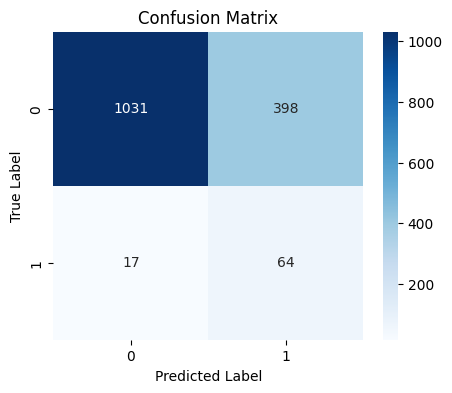

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1429
           1       0.14      0.79      0.24        81

    accuracy                           0.73      1510
   macro avg       0.56      0.76      0.53      1510
weighted avg       0.94      0.73      0.80      1510



In [85]:
rf = pickle.load(open('rf.pkl','rb'))

# Ejecutamos las predicciones
y_pred_rf_balanced = rf.predict(x_test)

# Mostramos resultados
resultados(y_test, y_pred_rf_balanced)


In [86]:
# Utilizamos este pequeño codigo para ilustrar cuales son las variables que el modelo prioriza para obtener los resultados
importancia_variables = pd.DataFrame(
                            {'variable': x.columns,
                             'relevancia':  rf.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_variables.sort_values('relevancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,variable,relevancia
2,age,0.805721
3,avg_glucose_level,0.131082
0,hypertension,0.037554
1,heart_disease,0.025644


<p align="justify">
Ahora utilizaremos un modificador diferente llamado SMOTE que se utiliza para crear ejemplos sintéticos de la clase minoritaria y equilibrar las clases.

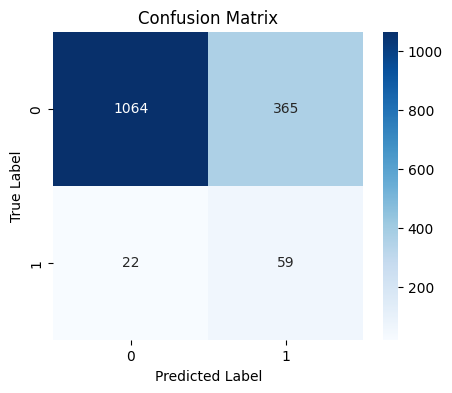

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1429
           1       0.14      0.73      0.23        81

    accuracy                           0.74      1510
   macro avg       0.56      0.74      0.54      1510
weighted avg       0.93      0.74      0.81      1510



In [87]:
# Eliminamos el penalizador de clase mayoritaria ya que lo que queremos evaluar es justamente el rendimiento del SMOTE sobre el dataset sin aplicar ningun otro tipo de modificador.
rf2 = rf.set_params(class_weight = None)

# Generamos los ejemplos sintéticos sobre los sets de entrenamiento que creamos anteriormente
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Entrenamos nuestro modelo y ejecutamos las predicciones
rf2.fit(x_train_smote, y_train_smote)
y_pred_rf_smote = rf2.predict(x_test)

# Mostramos resultados
resultados(y_test, y_pred_rf_smote)

In [88]:
# Utilizamos este pequeño codigo para ilustrar cuales son las variables que el modelo prioriza para obtener los resultados
importancia_variables = pd.DataFrame(
                            {'variable': x.columns,
                             'relevancia':  rf2.feature_importances_
}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_variables.sort_values('relevancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,variable,relevancia
2,age,0.809021
3,avg_glucose_level,0.151274
0,hypertension,0.022936
1,heart_disease,0.016769


<p align="justify">
Finalmente utilizamos el metodo NearMiss, una técnica de submuestreo que reduce el número de ejemplos de la clase mayoritaria para igualar el número de ejemplos de la clase minoritaria

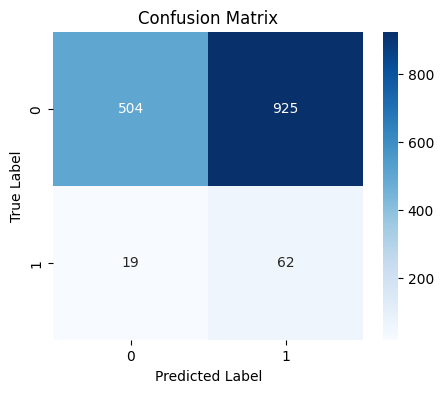

              precision    recall  f1-score   support

           0       0.96      0.35      0.52      1429
           1       0.06      0.77      0.12        81

    accuracy                           0.37      1510
   macro avg       0.51      0.56      0.32      1510
weighted avg       0.92      0.37      0.49      1510



In [89]:
# Generamos el submuestreo sobre los sets de entrenamiento
near_miss = NearMiss()
x_train_nm, y_train_nm = near_miss.fit_resample(x_train, y_train)

# Entrenamos nuestro modelo y ejecutamos las predicciones
rf2.fit(x_train_nm, y_train_nm)
y_pred_rf_nm = rf2.predict(x_test)

# Mostramos resultados
resultados(y_test, y_pred_rf_nm)

In [90]:
# Utilizamos este pequeño codigo para ilustrar cuales son las variables que el modelo prioriza para obtener los resultados
importancia_variables = pd.DataFrame(
                            {'variable': x.columns,
                             'relevancia':  rf2.feature_importances_
}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_variables.sort_values('relevancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,variable,relevancia
3,avg_glucose_level,0.732290
2,age,0.207377
0,hypertension,0.044647
1,heart_disease,0.015685


## Algoritmo de Clasificación (Regresión Logistica)
<p align="justify">
Consideremos otro modelo con el fin de comparar los resultados con el árbol de decisión que elegimos anteriormente, en esta oportunidad evaluaremos los resultados obtenidos utilizando el modelo de regresión logística.

<p align="justify">
Al igual que con el modelo anterior, aplicaremos los mismos modificadores y tecnicas para poder comparar resultados que sean coherentes entre si y de esta forma obtener el modelo que mejor performa.

Obviamente primero tendremos que encontrar los mejores parametros para el modelo y a continuación realizaremos las pruebas que modifican el dataset.




In [95]:
# Escalamos los datos ya que la regresión logistica es sensible a las escalas de los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Creamos la instancia de Regresión Logística con balanceo de clases
rl = LogisticRegression(class_weight='balanced', max_iter=1000)

# Definimos nuestros hiperparametros a evaluar (los datos aqui mostrados son los finales luego de haber hecho varias pruebas aumentando y disminuyendo los valores hasta dar con el mejor resultado)
hiperparametros={'C':[0.3,0.5,1.0],'solver':['lbfgs', 'liblinear', 'newton-cg'] }

In [96]:
# Generamos nuestra grilla que nos ayudara a evaluar los hiperparametros y a su vez realizar la validación cruzada
grilla = GridSearchCV(rl,hiperparametros,refit=True, cv=5,scoring= 'f1', n_jobs=-1)
grilla.fit(x_train_scaled,y_train)

# Generamos nuestro Halving
halving = HalvingGridSearchCV(rl,hiperparametros, cv=5, min_resources=100, scoring='f1', n_jobs=-1)
halving.fit(x_train_scaled, y_train)

# Generamos nuestro Random Search
randomSearch = RandomizedSearchCV(rl, hiperparametros, cv=5, scoring='f1', n_jobs=-1 )
randomSearch.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=1000),
                   n_jobs=-1,
                   param_distributions={'C': [0.3, 0.5, 1.0],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg']},
                   scoring='f1')

In [97]:
# Mostramos por consola los mejores parametros y el mejor resultado obtenido por cada modelo
print("GridSearch")
print("Mejores parametros", grilla.best_params_)
print("Score", grilla.best_score_,"\n")

print("Halving")
print("Mejores parametros", halving.best_params_)
print("Score", halving.best_score_,"\n")

print("RandomSearch")
print("Mejores parametros", randomSearch.best_params_)
print("Score", randomSearch.best_score_)

GridSearch
Mejores parametros {'C': 0.5, 'solver': 'lbfgs'}
Score 0.2231470771791138 

Halving
Mejores parametros {'C': 0.3, 'solver': 'newton-cg'}
Score 0.18359004480872715 

RandomSearch
Mejores parametros {'solver': 'lbfgs', 'C': 0.5}
Score 0.2231470771791138


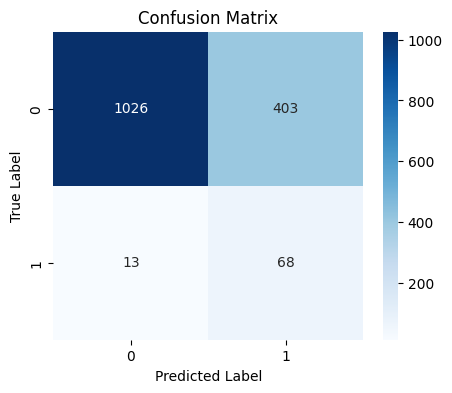

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1429
           1       0.14      0.84      0.25        81

    accuracy                           0.72      1510
   macro avg       0.57      0.78      0.54      1510
weighted avg       0.94      0.72      0.80      1510



In [98]:
# Seteamos nuestro modelo con los hiperparametros que mejor rendimiento tuvieron
rl = grilla.best_estimator_

# Entrenamos el modelo
rl.fit(x_train_scaled, y_train)
y_pred_rl_balanced = rl.predict(x_test_scaled)

# Mostramos resultados
resultados(y_test, y_pred_rl_balanced)

<p align="justify">
Ahora utilizaremos un modificador diferente llamado SMOTE que se utiliza para crear ejemplos sintéticos de la clase minoritaria y equilibrar las clases, pero esta vez con la regresión logística

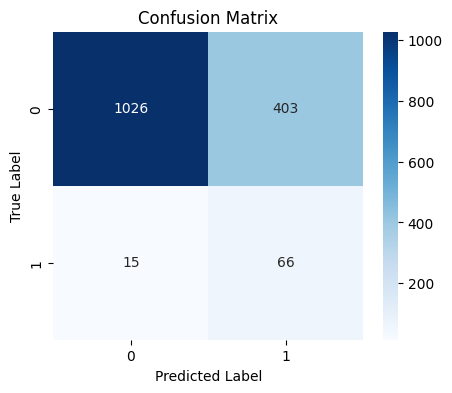

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1429
           1       0.14      0.81      0.24        81

    accuracy                           0.72      1510
   macro avg       0.56      0.77      0.54      1510
weighted avg       0.94      0.72      0.80      1510



In [99]:
# Eliminamos el penalizador de clase mayoritaria ya que lo que queremos evaluar es justamente el rendimiento del SMOTE sobre el dataset sin aplicar ningun otro tipo de modificador.
rl2 = rl.set_params(class_weight = None)

# Generamos los ejemplos sintéticos sobre los sets de entrenamiento
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

# Entrenamos el modelo
rl2.fit(x_train_smote, y_train_smote)
y_pred_rl_smote = rl2.predict(x_test_scaled)

# Mostramos resultados
resultados(y_test, y_pred_rl_smote)

<p align="justify">
Finalmente utilizamos el metodo NearMiss, una técnica de submuestreo que reduce el número de ejemplos de la clase mayoritaria para igualar el número de ejemplos de la clase minoritaria

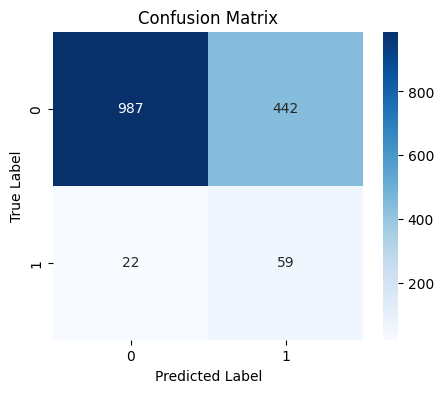

              precision    recall  f1-score   support

           0       0.98      0.69      0.81      1429
           1       0.12      0.73      0.20        81

    accuracy                           0.69      1510
   macro avg       0.55      0.71      0.51      1510
weighted avg       0.93      0.69      0.78      1510



In [100]:
# Generamos el submuestreo sobre los sets de entrenamiento
near_miss = NearMiss()
x_train_nm, y_train_nm = near_miss.fit_resample(x_train_scaled, y_train)

# Entrenamos el modelo
rl2.fit(x_train_nm, y_train_nm)
y_pred_rl_nm = rl2.predict(x_test_scaled)

# Mostramos resultados
resultados(y_test, y_pred_rl_nm)

## Algoritmo de Clasificación (KNN)

<p align="justify">
Para nuestro tercer modelo vamos a utilizar KNN y el acercamiento en este caso va a ser un poco diferente a los demas, ya que KNN depende muchisimo de las cantidades de registros disponibles y como bien sabemos nuestro dataset cuenta con un módico número de registros y a eso hay que sumarle que esta desbalanceado.
<p align="justify">
Por este motivo a diferencia de lo ocurrido en los anteriores, vamos a estar ajustando el modelo para cada muestra, es decir, el modelo va a modificar sus parametros para obtener el mejor resultado posible en base al modificador que implementemos para tratar el desbalance.
<p align="justify">
Al igual que hicimos en los anteriores primero vamos a intentar penalizar la clase mayoritaria, luego aplicando SMOTE y finalmente Near Miss.




In [137]:
# Creamos la instancia de KNN sin parametros ya que vamos a buscar las mejores opciones durante el siguiente paso
KNN = KNeighborsClassifier()

# Definimos nuestros hiperparametros a evaluar (los datos aqui mostrados son los finales luego de haber hecho varias pruebas aumentando y disminuyendo los valores hasta dar con el mejor resultado)
hiperparametros={'n_neighbors':[1,2], 'weights':['uniform', 'distance'], 'leaf_size': [1,2], 'p': [1,2,3]}

In [138]:
# Generamos nuestra grilla que nos ayudara a evaluar los hiperparametros y a su vez realizar la validación cruzada
grilla = GridSearchCV(KNN,hiperparametros, refit=True, cv=5,scoring= 'f1', n_jobs=-1)
grilla.fit(x_train_scaled ,y_train)

# Generamos nuestro Halving
halving = HalvingGridSearchCV(KNN,hiperparametros,refit=True, cv=5, min_resources=100, scoring='f1', n_jobs=-1)
halving.fit(x_train_scaled, y_train)

# Generamos nuestro Random Search
randomSearch = RandomizedSearchCV(KNN, hiperparametros, refit=True, cv=5, scoring='f1', n_jobs=-1, )
randomSearch.fit(x_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'leaf_size': [1, 2],
                                        'n_neighbors': [1, 2], 'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   scoring='f1')

In [139]:
# Mostramos por consola los mejores parametros y el mejor resultado obtenido por cada modelo
print("GridSearch")
print("Mejores parametros", grilla.best_params_)
print("Score", grilla.best_score_,"\n")

print("Halving")
print("Mejores parametros", halving.best_params_)
print("Score", halving.best_score_,"\n")

print("RandomSearch")
print("Mejores parametros", randomSearch.best_params_)
print("Score", randomSearch.best_score_)

GridSearch
Mejores parametros {'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Score 0.12618885678744834 

Halving
Mejores parametros {'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
Score 0.1581699346405229 

RandomSearch
Mejores parametros {'weights': 'uniform', 'p': 2, 'n_neighbors': 1, 'leaf_size': 1}
Score 0.12618885678744834


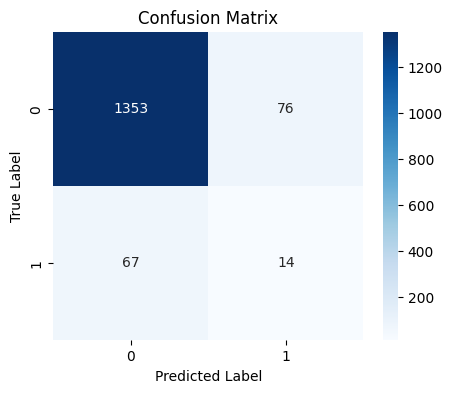

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1429
           1       0.16      0.17      0.16        81

    accuracy                           0.91      1510
   macro avg       0.55      0.56      0.56      1510
weighted avg       0.91      0.91      0.91      1510



In [140]:
# Seteamos nuestro modelo con los hiperparametros que mejor rendimiento tuvieron
KNN = halving.best_estimator_

# Entrenamos el modelo
KNN.fit(x_train_scaled, y_train)
y_pred_KNN_balanced = KNN.predict(x_test_scaled)

# Mostramos resultados
resultados(y_test, y_pred_KNN_balanced)

Ahora utilizaremos nuevamente SMOTE, vamos a utilizar los mismos set de entrenamiento que creamos en regresión logistica ya que los mismos estan creados a partir de los subgrupos escalados y aplican perfectamente a KNN.

In [105]:
# Creamos una nueva instancia limpia de KNN sin parametros ya que vamos a buscar las mejores opciones durante el siguiente paso
KNN2 = KNeighborsClassifier()

# Definimos nuestros hiperparametros a evaluar (los datos aqui mostrados son los finales luego de haber hecho varias pruebas aumentando y disminuyendo los valores hasta dar con el mejor resultado)
hiperparametros={'n_neighbors':[2,10,15], 'weights':['uniform', 'distance'], 'leaf_size': [1,2,3], 'p': [1,2]}

In [106]:
# Generamos nuestra grilla que nos ayudara a evaluar los hiperparametros y a su vez realizar la validación cruzada
grilla = GridSearchCV(KNN,hiperparametros,refit=True, cv=5,scoring= 'f1', n_jobs=-1,)
grilla.fit(x_train_smote ,y_train_smote)

# Generamos nuestro Halving
halving = HalvingGridSearchCV(KNN,hiperparametros, cv=5, min_resources=100, scoring='f1', n_jobs=-1)
halving.fit(x_train_smote, y_train_smote)

# Generamos nuestro Random Search
randomSearch = RandomizedSearchCV(KNN, hiperparametros, cv=5, scoring='f1', n_jobs=-1 )
randomSearch.fit(x_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=KNeighborsClassifier(leaf_size=1, n_neighbors=1,
                                                  p=1, weights='distance'),
                   n_jobs=-1,
                   param_distributions={'leaf_size': [1, 2, 3],
                                        'n_neighbors': [2, 10, 15], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='f1')

In [107]:
# Mostramos por consola los mejores parametros y el mejor resultado obtenido por cada modelo
print("GridSearch")
print("Mejores parametros", grilla.best_params_)
print("Score", grilla.best_score_,"\n")

print("Halving")
print("Mejores parametros", halving.best_params_)
print("Score", halving.best_score_,"\n")

print("RandomSearch")
print("Mejores parametros", randomSearch.best_params_)
print("Score", randomSearch.best_score_)

GridSearch
Mejores parametros {'leaf_size': 1, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Score 0.877289059018054 

Halving
Mejores parametros {'leaf_size': 1, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Score 0.860966203228857 

RandomSearch
Mejores parametros {'weights': 'distance', 'p': 1, 'n_neighbors': 10, 'leaf_size': 2}
Score 0.877289059018054


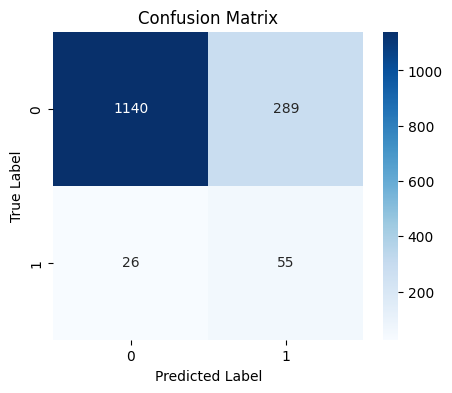

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1429
           1       0.16      0.68      0.26        81

    accuracy                           0.79      1510
   macro avg       0.57      0.74      0.57      1510
weighted avg       0.93      0.79      0.85      1510



In [52]:
# Seteamos nuestro modelo con los hiperparametros que mejor rendimiento tuvieron
KNN2 = grilla.best_estimator_

# Entrenamos el modelo
KNN2.fit(x_train_smote, y_train_smote)
y_pred_KNN_smote = KNN2.predict(x_test_scaled)

# Mostramos resultados
resultados(y_test, y_pred_KNN_smote)

Por ultimo utilizaremos los subset de Near Miss pero aplicados al modelo KNN y veremos que resultados obtenemos

In [109]:
# Creamos una nueva instancia limpia de KNN sin parametros ya que vamos a buscar las mejores opciones durante el siguiente paso
KNN3 = KNeighborsClassifier()

# Definimos nuestros hiperparametros a evaluar (los datos aqui mostrados son los finales luego de haber hecho varias pruebas aumentando y disminuyendo los valores hasta dar con el mejor resultado)
hiperparametros={'n_neighbors':[6,8,10], 'weights':['uniform', 'distance'], 'leaf_size': [1,2,3], 'p': [1,2]}

In [110]:
# Generamos nuestra grilla que nos ayudara a evaluar los hiperparametros y a su vez realizar la validación cruzada
grilla = GridSearchCV(KNN,hiperparametros, refit=True, cv=5,scoring= 'f1', n_jobs=-1,)
grilla.fit(x_train_nm ,y_train_nm)

# Generamos nuestro Halving
halving = HalvingGridSearchCV(KNN,hiperparametros, refit=True, cv=5, min_resources=100, scoring='f1', n_jobs=-1)
halving.fit(x_train_nm, y_train_nm)

# Generamos nuestro Random Search
randomSearch = RandomizedSearchCV(KNN, hiperparametros, refit=True, cv=5, scoring='f1', n_jobs=-1 )
randomSearch.fit(x_train_nm, y_train_nm)

RandomizedSearchCV(cv=5,
                   estimator=KNeighborsClassifier(leaf_size=1, n_neighbors=1,
                                                  p=1, weights='distance'),
                   n_jobs=-1,
                   param_distributions={'leaf_size': [1, 2, 3],
                                        'n_neighbors': [6, 8, 10], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='f1')

In [111]:
# Mostramos por consola los mejores parametros y el mejor resultado obtenido por cada modelo
print("GridSearch")
print("Mejores parametros", grilla.best_params_)
print("Score", grilla.best_score_,"\n")

print("Halving")
print("Mejores parametros", halving.best_params_)
print("Score", halving.best_score_,"\n")

print("RandomSearch")
print("Mejores parametros", randomSearch.best_params_)
print("Score", randomSearch.best_score_)

GridSearch
Mejores parametros {'leaf_size': 1, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
Score 0.7156251502247997 

Halving
Mejores parametros {'leaf_size': 1, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
Score 0.7273358945900565 

RandomSearch
Mejores parametros {'weights': 'uniform', 'p': 2, 'n_neighbors': 10, 'leaf_size': 3}
Score 0.7047422899768118


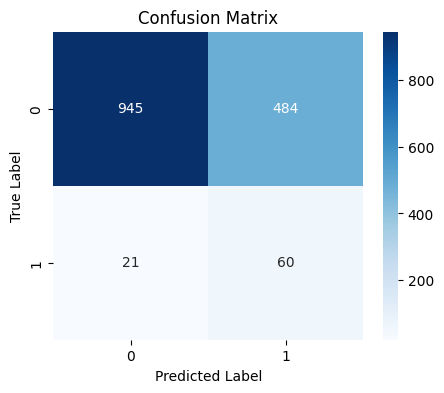

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      1429
           1       0.11      0.74      0.19        81

    accuracy                           0.67      1510
   macro avg       0.54      0.70      0.49      1510
weighted avg       0.93      0.67      0.76      1510



In [112]:
# Seteamos nuestro modelo con los hiperparametros que mejor rendimiento tuvieron
KNN3 = halving.best_estimator_

# Entrenamos el modelo
KNN3.fit(x_train_nm, y_train_nm)
y_pred_KNN_nm = KNN3.predict(x_test_scaled)

# Mostramos resultados
resultados(y_test, y_pred_KNN_nm)

## Resultados

<p align="justify">
A continuación generaremos un dataset con los resultados obtenidos por los diferentes modelos y estrategias utilizadas, esta visión simplificada nos permitirá elegir los dos modelos y estrategias que mejor hayan performado para continuar con la mejora de los mismos y ver hasta donde podemos lograr subir los valores resultantes.

In [113]:
# Creamos la estructura de nuestro dataframe de resultados para alojar los resultados de cada modelo
columnas = ['Modelo', 'Estrategia','Target', 'Rendimiento', 'Precision', 'Recall', 'F1-Score', 'Accuracy']
df_resultados = pd.DataFrame(columns=columnas)

# Definimos la función que se encarga de extraer los datos e incorporarlos al dataset
def guardar_resultados(df, nombre_modelo,estrategia, y_test, y_pred):
    targets = {'0','1'}
    temp = classification_report(y_test, y_pred, output_dict=True)
    for i in targets:
      resultado = "Negativo" if i == '0' else "Positivo"
      nueva_entrada = {
        'Modelo': nombre_modelo,
        'Estrategia': estrategia,
        'Target': resultado,
        'F1-Score': round(temp[i]['f1-score'],2),
        'Precision': round(temp[i]['precision'],2),
        'Recall': round(temp[i]['recall'],2),
        'Accuracy': round(temp['accuracy'],2),
        'Rendimiento' : round(temp['1']['f1-score'],2)*100
      }
      df = pd.concat([df, pd.DataFrame([nueva_entrada])], ignore_index=True,)
    return df


df_resultados = guardar_resultados (df_resultados, 'Random Forest','Balance', y_test, y_pred_rf_balanced)
df_resultados = guardar_resultados (df_resultados, 'Random Forest', 'SMOTE', y_test, y_pred_rf_smote)
df_resultados = guardar_resultados (df_resultados, 'Random Forest', 'Near Miss', y_test, y_pred_rf_nm)
df_resultados = guardar_resultados (df_resultados, 'R.Logistica','Balance', y_test, y_pred_rl_balanced)
df_resultados = guardar_resultados (df_resultados, 'R.Logistica','SMOTE', y_test, y_pred_rl_smote)
df_resultados = guardar_resultados (df_resultados, 'R.Logistica','Near Miss', y_test, y_pred_rl_nm)
df_resultados = guardar_resultados (df_resultados, 'KNN','Balanced', y_test, y_pred_KNN_balanced)
df_resultados = guardar_resultados (df_resultados, 'KNN','SMOTE', y_test, y_pred_KNN_smote)
df_resultados = guardar_resultados (df_resultados, 'KNN','Near Miss', y_test, y_pred_KNN_nm)
df_resultados.sort_values(by=['Rendimiento', 'Modelo', 'Estrategia'], ascending = [False,True,True])

,Modelo,Estrategia,Target,Rendimiento,Precision,Recall,F1-Score,Accuracy
14,KNN,SMOTE,Positivo,26.0,0.16,0.68,0.26,0.79
15,KNN,SMOTE,Negativo,26.0,0.98,0.80,0.88,0.79
6,R.Logistica,Balance,Positivo,25.0,0.14,0.84,0.25,0.72
7,R.Logistica,Balance,Negativo,25.0,0.99,0.72,0.83,0.72
8,R.Logistica,SMOTE,Positivo,24.0,0.14,0.81,0.24,0.72
9,R.Logistica,SMOTE,Negativo,24.0,0.99,0.72,0.83,0.72
0,Random Forest,Balance,Positivo,24.0,0.14,0.79,0.24,0.73
1,Random Forest,Balance,Negativo,24.0,0.98,0.72,0.83,0.73
2,Random Forest,SMOTE,Positivo,23.0,0.14,0.73,0.23,0.74
3,Random Forest,SMOTE,Negativo,23.0,0.98,0.74,0.85,0.74


💡 **Insights**

Si bien la tabla la ordenamos en función a los valores obtenidos en el F1-score debemos prestar atención especialmente a la columna de Recall en las filas de "positivo" ya que esos registros nos permiten saber que portentaje de acierto tiene sobre casos confirmados, en definitiva, es lo que necesitamos poder predecir, teniendo esto en cuenta podemos conclucir:

*   Al igual que sucede con Random Forest, en regresión logística encontramos que el modelo utilizando la penalización de la clase mayoritaria tienen un mejor desempeño sobre smote y near miss, la regresion logística al tener un recall superior disminuye levemente los falsos positivos por lo que sería el modelo mas preciso que probamos hasta ahora.
*   En los tres casos se observa un alto numero de falsos positivos por lo que el F1 score es deficiente en todos los casos impactando directamente en el alto valor de falsos positivos como se mencionó anteriormente.
*   KNN no tiene un parámetro para penalizar directamente la clase mayoritaria,siendo la mejor estrtrategia el Near Miss que obtiene 0.74 de recall con un F1 de 0.19, siendo nuestro modelo más pobre prediciendo los casos positivos pero es el mejor en el cuanto a F1-score utilizando SMOTE ya que es el que menos falsos positivos detecta en esta primera iteración.




# Mejorando nuestros modelos

<p aling="justify">
Ya con los valores de referencia de la primera iteración vamos a intentar mejorar los resultados de nuestros modelos haciendo pequeños cambios, primeramente utilizando la categorización de variables y en segunda instancia utilizando un umbral optimo personalizado para encontrar el mejor punto de corte en cada caso.

## Datos de entrada, un nuevo enfoque

<p align="Justify">
En esta sección vamos a intentar correr nuestros modelos pero haciendo un pequeño cambio en los valores de entrada, convertiremos nuestras variables continuas en categoricas para evitar un poco el sesgo en los modelos, para ello entonces vamos a utilizar los mismos intervalos que generamos para las edades y para el promedio de azucar en sangre que vimos en las tablas pivots, pero esta vez alimentaran nuestro modelo y veremos que resultados arroja.

In [114]:
# Creamos una copia de nuestro DF sin encodear y lo llamaremos encoded2 para separarlo del que veniamos usando
encoded2 = df_stroke.drop(['age', 'ever_married','work_type' ,'residence_type', 'avg_glucose_level','bmi', 'smoking_status'], axis=1)
encoded2 = pd.get_dummies(encoded2)

# Dropeamos las columnas de valores binarios para quedarnos solo con 1
encoded2 =encoded2.drop(columns=['hypertension_0','heart_disease_0','gender_Female'])

# Renombramos algunas columnas para que tengan mas sentido
encoded2 = encoded2.rename(columns= {'gender_Male': 'gender', 'hypertension_1': 'hypertension', 'heart_disease_1' : 'heart_disease'})
encoded2

,stroke,gender,hypertension,heart_disease,"Grupo de Edad_(0, 18]","Grupo de Edad_(18, 35]","Grupo de Edad_(35, 55]","Grupo de Edad_(55, 70]","Grupo de Edad_(70, 82]","Azucar en Sangre_(50, 100]","Azucar en Sangre_(100, 150]","Azucar en Sangre_(150, 200]","Azucar en Sangre_(200, 250]","Azucar en Sangre_(250, 300]"
0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,1,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,0,0,0,0,1,1,0,0,0,0
5106,0,0,0,0,0,0,0,0,1,0,1,0,0,0
5107,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5108,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [115]:
# Almacenamos la variable stroke como string ya que sino el diagrama del random forest es incompatible con el int64
encoded2[['stroke']] = encoded2[['stroke']].astype("category")

# Definimos nuestras variables
x2= encoded2.drop(['stroke'], axis=1)
y2= encoded2['stroke']

# Generamos nuestros sets de entrenamiento y testeo
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=1)

## Corte Optimo

<p align="Justify">
Adicionalmente vamos a correr la siguiente función para calcular el corte optimo en cada modelo y de ahi obtener los resultados y ver si hya una mejoría y como este umbral personalizado nos puede ayudar a mejorar los resultados ya obtenidos o no, esto servirá como una ultima iteración de mejora de nuestros modelos.

In [116]:
#  Definimos una función para calcular el corte optimo a la cual le brindamos el modelo a evaluar y los datos de testeo.

def corte_optimo(md, x, y):
  # Calculamos las probabilidades para cada caso de nuestro conjunto de test y nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
  modelo = md.predict_proba(x)
  modelo = modelo[:, 1]

  # Generamos nuestras variables FPR y TPR que utilizaremos para medir las distancias con la curva de referencia
  fpr, tpr, umbrales = roc_curve(y, modelo)

  # Calculamos la distancia al punto (0, 1) para encontrar el punto de corte óptimo
  distancias = np.sqrt((1 - tpr)**2 + fpr**2)
  corte_optimo = np.argmin(distancias)
  umbral_optimo = umbrales[corte_optimo]
  print("Punto de corte óptimo:", umbral_optimo)

  # Mostramos nuestros resultados luego de la clasificación personalizada
  y_pred = (modelo > umbral_optimo).astype(int)

  resultados(y, y_pred)

## Random Forest

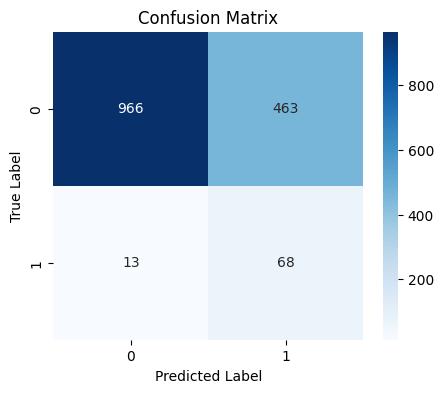

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      1429
           1       0.13      0.84      0.22        81

    accuracy                           0.68      1510
   macro avg       0.56      0.76      0.51      1510
weighted avg       0.94      0.68      0.77      1510



In [117]:
# Regeneramos nuestro modelo Random Forest
rf3 = RandomForestClassifier(random_state=42, class_weight='balanced',max_depth = 8, min_samples_leaf= 8, max_leaf_nodes=11, n_estimators= 800)

# Entrenamos nuestro modelo y ejecutamos las predicciones
rf3 = rf3.fit(x_train2, y_train2)
y_pred_rf_balanced_c = rf3.predict(x_test2)

# Mostramos resultados
resultados(y_test2, y_pred_rf_balanced_c)

Punto de corte óptimo: 0.5838528952962507


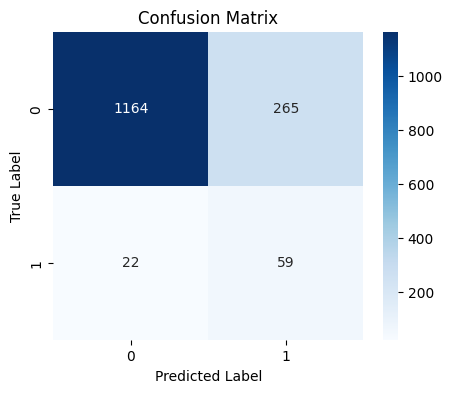

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1429
           1       0.18      0.73      0.29        81

    accuracy                           0.81      1510
   macro avg       0.58      0.77      0.59      1510
weighted avg       0.94      0.81      0.86      1510



In [118]:
corte_optimo(rf3,x_test2,y_test2)

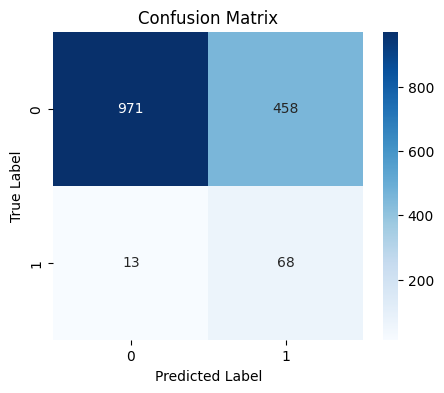

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      1429
           1       0.13      0.84      0.22        81

    accuracy                           0.69      1510
   macro avg       0.56      0.76      0.51      1510
weighted avg       0.94      0.69      0.77      1510



In [119]:
# Eliminamos el modificador que penaliza la clase mayoritaria
rf4 = rf3.set_params(class_weight = None)

# Generamos los ejemplos sintéticos sobre los sets de entrenamiento que creamos anteriormente
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train2, y_train2)

# Entrenamos nuestro modelo y ejecutamos las predicciones
rf4.fit(x_train_smote, y_train_smote)
y_pred_rf_smote_c = rf4.predict(x_test2)

# Mostramos resultados
resultados(y_test, y_pred_rf_smote_c)

Punto de corte óptimo: 0.5797779506895866


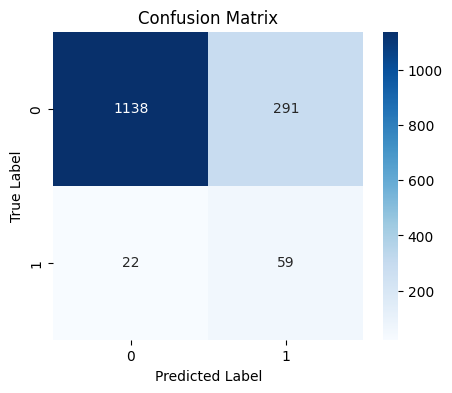

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1429
           1       0.17      0.73      0.27        81

    accuracy                           0.79      1510
   macro avg       0.57      0.76      0.58      1510
weighted avg       0.94      0.79      0.85      1510



In [120]:
corte_optimo(rf4,x_test2,y_test2)

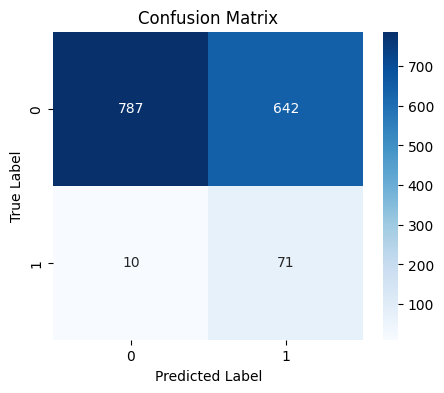

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1429
           1       0.10      0.88      0.18        81

    accuracy                           0.57      1510
   macro avg       0.54      0.71      0.44      1510
weighted avg       0.94      0.57      0.68      1510



In [121]:
# Generamos el submuestreo sobre los sets de entrenamiento
near_miss = NearMiss()
x_train_nm, y_train_nm = near_miss.fit_resample(x_train2, y_train2)

# Entrenamos nuestro modelo y ejecutamos las predicciones
rf4.fit(x_train_nm, y_train_nm)
y_pred_rf_nm_c = rf4.predict(x_test2)

# Mostramos resultados
resultados(y_test, y_pred_rf_nm_c)

Punto de corte óptimo: 0.5823619352893764


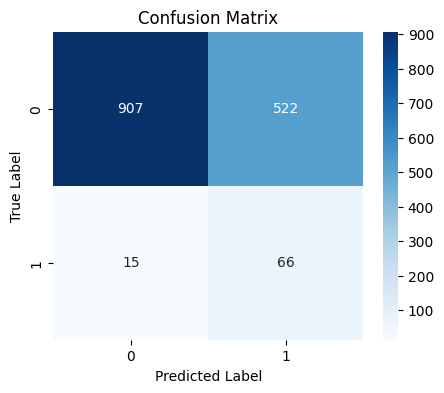

              precision    recall  f1-score   support

           0       0.98      0.63      0.77      1429
           1       0.11      0.81      0.20        81

    accuracy                           0.64      1510
   macro avg       0.55      0.72      0.48      1510
weighted avg       0.94      0.64      0.74      1510



In [122]:
corte_optimo(rf4,x_test2,y_test2)

## Regresión Logística

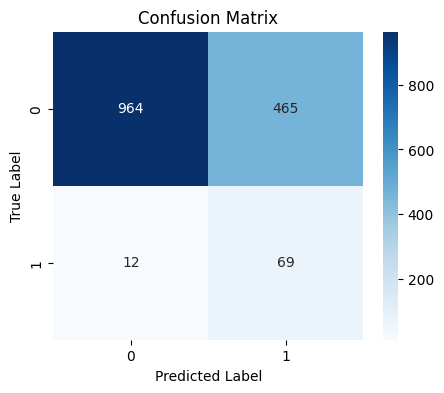

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1429
           1       0.13      0.85      0.22        81

    accuracy                           0.68      1510
   macro avg       0.56      0.76      0.51      1510
weighted avg       0.94      0.68      0.77      1510



In [123]:
# Escalamos los datos ya que la regresión logistica es sensible a las escalas de los datos
scaler = StandardScaler()
x_train_scaled2 = scaler.fit_transform(x_train2)
x_test_scaled2 = scaler.transform(x_test2)

rl3 = LogisticRegression(class_weight='balanced', C= 0.5, solver='lbfgs', max_iter=1000)

# Entrenamos el modelo
rl3.fit(x_train_scaled2, y_train2)
y_pred_rl_balanced_c = rl3.predict(x_test_scaled2)

# Mostramos resultados
resultados(y_test, y_pred_rl_balanced_c)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Punto de corte óptimo: 0.3017208664395181


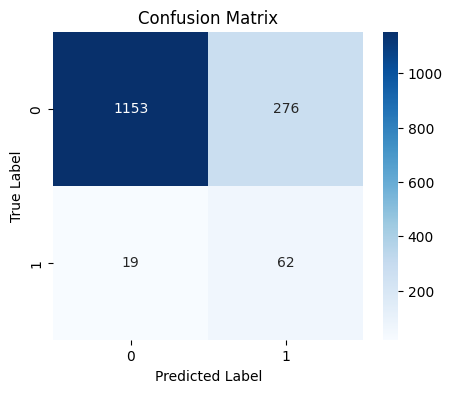

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1429
           1       0.18      0.77      0.30        81

    accuracy                           0.80      1510
   macro avg       0.58      0.79      0.59      1510
weighted avg       0.94      0.80      0.85      1510



In [124]:
corte_optimo(rl3,x_test2,y_test2)

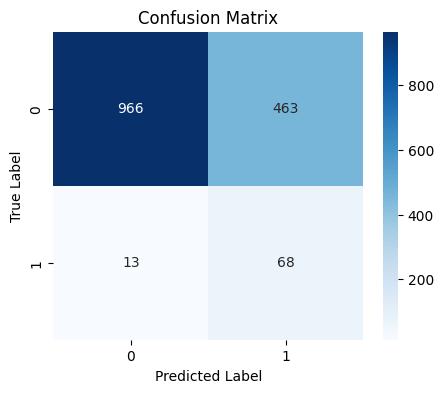

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      1429
           1       0.13      0.84      0.22        81

    accuracy                           0.68      1510
   macro avg       0.56      0.76      0.51      1510
weighted avg       0.94      0.68      0.77      1510



In [125]:
# Creamos la instancia de Regresión Logística sin balanceo de clases ya que utilizamos Smote
rl4 = LogisticRegression(C= 0.5, solver='lbfgs', max_iter=1000)

# Generamos los ejemplos sintéticos sobre los sets de entrenamiento
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled2, y_train2)

# Entrenamos el modelo
rl4.fit(x_train_smote, y_train_smote)
y_pred_rl_smote_c = rl4.predict(x_test_scaled2)

# Mostramos resultados
resultados(y_test, y_pred_rl_smote_c)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Punto de corte óptimo: 0.2858848066614662


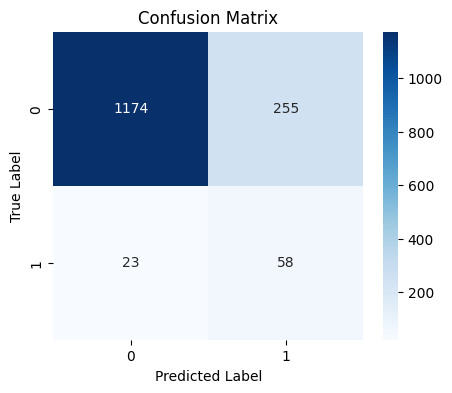

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1429
           1       0.19      0.72      0.29        81

    accuracy                           0.82      1510
   macro avg       0.58      0.77      0.59      1510
weighted avg       0.94      0.82      0.86      1510



In [126]:
corte_optimo(rl4,x_test2,y_test2)

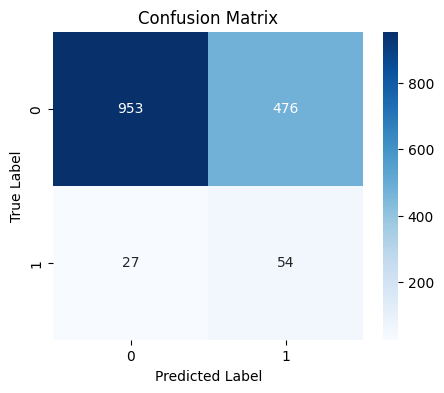

              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1429
           1       0.10      0.67      0.18        81

    accuracy                           0.67      1510
   macro avg       0.54      0.67      0.48      1510
weighted avg       0.93      0.67      0.76      1510



In [127]:
# Generamos el submuestreo sobre los sets de entrenamiento
near_miss = NearMiss()
x_train_nm, y_train_nm = near_miss.fit_resample(x_train_scaled2, y_train2)

# Entrenamos el modelo
rl4.fit(x_train_nm, y_train_nm)
y_pred_rl_nm_c = rl4.predict(x_test_scaled2)

# Mostramos resultados
resultados(y_test, y_pred_rl_nm_c)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Punto de corte óptimo: 0.5002469522168306


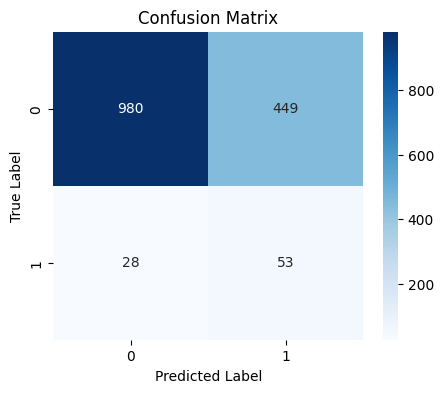

              precision    recall  f1-score   support

           0       0.97      0.69      0.80      1429
           1       0.11      0.65      0.18        81

    accuracy                           0.68      1510
   macro avg       0.54      0.67      0.49      1510
weighted avg       0.93      0.68      0.77      1510



In [128]:
corte_optimo(rl4,x_test2,y_test2)

## KNN

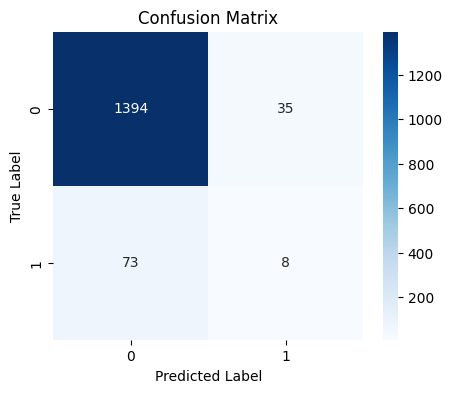

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1429
           1       0.19      0.10      0.13        81

    accuracy                           0.93      1510
   macro avg       0.57      0.54      0.55      1510
weighted avg       0.91      0.93      0.92      1510



In [141]:
# Entrenamos el modelo
KNN.fit(x_train_scaled2, y_train2)
y_pred_KNN_balanced_c = KNN.predict(x_test_scaled2)

# Mostramos resultados
resultados(y_test, y_pred_KNN_balanced_c)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Punto de corte óptimo: 0.2


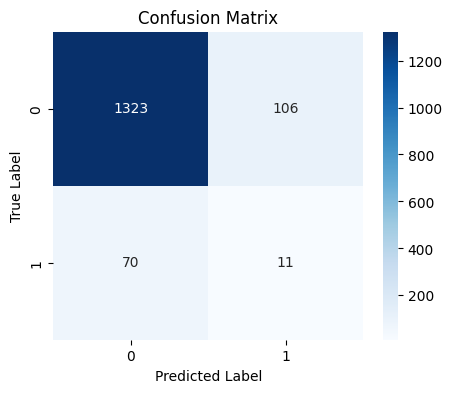

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1429
           1       0.09      0.14      0.11        81

    accuracy                           0.88      1510
   macro avg       0.52      0.53      0.52      1510
weighted avg       0.90      0.88      0.89      1510



In [135]:
corte_optimo(KNN,x_test2,y_test2)

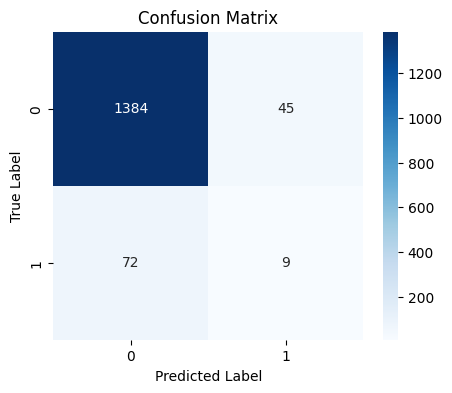

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1429
           1       0.17      0.11      0.13        81

    accuracy                           0.92      1510
   macro avg       0.56      0.54      0.55      1510
weighted avg       0.91      0.92      0.92      1510



In [142]:
# Entrenamos el modelo
KNN2.fit(x_train_smote, y_train_smote)
y_pred_KNN_SMOTE_c = KNN2.predict(x_test_scaled2)

# Mostramos resultados
resultados(y_test, y_pred_KNN_SMOTE_c)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Punto de corte óptimo: 0.4


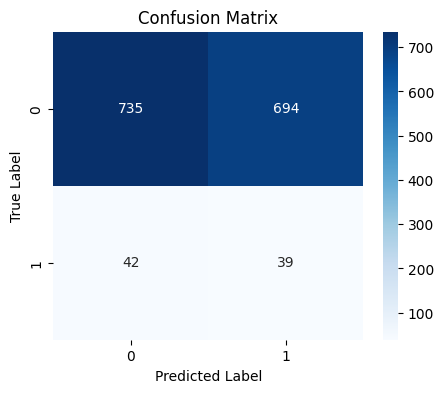

              precision    recall  f1-score   support

           0       0.95      0.51      0.67      1429
           1       0.05      0.48      0.10        81

    accuracy                           0.51      1510
   macro avg       0.50      0.50      0.38      1510
weighted avg       0.90      0.51      0.64      1510



In [143]:
corte_optimo(KNN2,x_test2,y_test2)

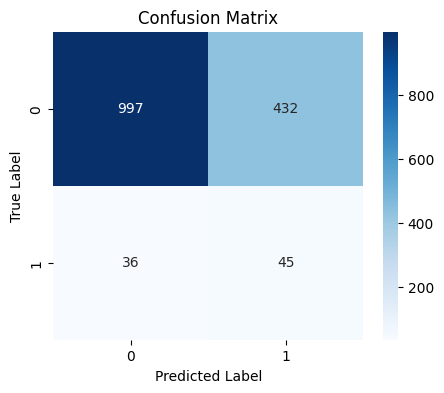

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      1429
           1       0.09      0.56      0.16        81

    accuracy                           0.69      1510
   macro avg       0.53      0.63      0.49      1510
weighted avg       0.92      0.69      0.78      1510



In [144]:
# Entrenamos el modelo
KNN3.fit(x_train_nm, y_train_nm)
y_pred_KNN_nm_c = KNN3.predict(x_test_scaled2)

# Mostramos resultados
resultados(y_test, y_pred_KNN_nm_c)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Punto de corte óptimo: 0.875


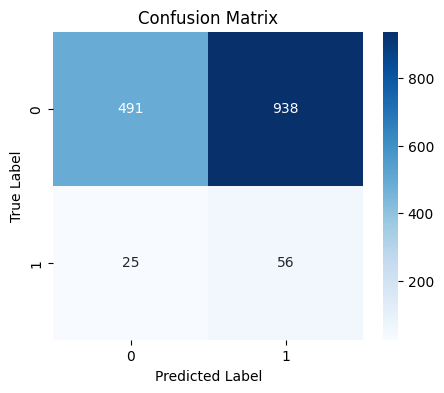

              precision    recall  f1-score   support

           0       0.95      0.34      0.50      1429
           1       0.06      0.69      0.10        81

    accuracy                           0.36      1510
   macro avg       0.50      0.52      0.30      1510
weighted avg       0.90      0.36      0.48      1510



In [145]:
corte_optimo(KNN3,x_test2,y_test2)

# Conclusiones 📓

Basándonos en lo anteriormente expuesto, podemos concluir:

*   La edad y las condiciones clinicas adversas como problemas de diabetes y enfermedades coronarias pueden ser causales de cuadros que deriven en un accidente cerebrovascular
*   El género como la actividad laboral parecen influir ligeramente en los casos positivos
*   La situación habitacional y la condición frente al tabaquismo no parecen a priori arrojar datos concluyentes como posibles variables para tener en cuenta.
*   El modelo que mejor se adaptaría en este momento para precedir futuros casos de ACV seria un algoritmo de regresión logística utilizando la penalizacion de la clase mayoritaria, dando como resultado un recall por encima de 80% pero que aun sufre de un alto número de "falsos positivos".
*   Se sugiere al cliente comenzar con la obtención de datos de los pacientes de forma mas granular, por ejemplo obteniendo los valores promedios diarios de hipertensión en lugar de clasificar binariamente los registros, tambien obtener las affecciones cardiacas en detalle, estos cambios ayudarian al modelo a tener más información a la hora de descartar aquellos casos que son falsos positivos.








